<a href="https://colab.research.google.com/github/shitizz24/Heuristic-TSP/blob/master/Tabu_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
f=open('Input/input2.txt','r')

In [3]:
n=int(f.readline())
xcord=[float(x) for x in f.readline().split(' ')][:n]
ycord=[float(x) for x in f.readline().split(' ')][:n]
print(f'{n}')


20


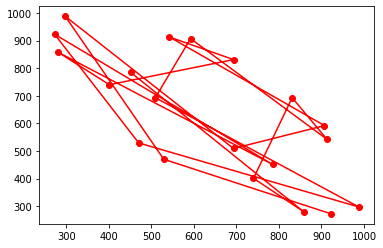

In [4]:
axes=plt.gca()
line,=axes.plot(xcord,ycord,'ro-')
plt.savefig('Init.png')
plt.show()

In [5]:
def dist(xcord,ycord,i,j):
  return (math.sqrt( (xcord[i]-xcord[j])**2 + (ycord[i]-ycord[j])**2 ))

In [6]:
x = [i for i in range(n)]
xcord = [xcord[x[i]] for i in range(n)]
ycord = [ycord[x[i]] for i in range(n)]

initial_cost = sum([dist(xcord, ycord, i, (i+1)%n) for i in range(n)])


In [7]:
def heuristic(xcord, ycord, i, j, current_cost):
  total = current_cost

  if i == 0 and j == n-1:
    i, j = j, i

  if j!=(i+1)%n:
    total -= dist(xcord, ycord, i, (i+1)%n)
    total -= dist(xcord, ycord, j, (j-1+n)%n)
    total += dist(xcord, ycord, j, (i+1)%n)
    total += dist(xcord, ycord, i, (j-1+n)%n)

  total -= dist(xcord, ycord, i, (i-1+n)%n)
  total -= dist(xcord, ycord, j, (j+1)%n)
  total += dist(xcord, ycord, i, (j+1)%n)
  total += dist(xcord, ycord, j, (i-1+n)%n)
  return (total)

In [8]:
def draw(finished, iteration, cost):
  newxcord = xcord.copy() + [xcord[0]]
  newycord = ycord.copy() + [ycord[0]]

  title = "Final " if finished else "iteration no. %d \n" % iteration
  title = title + ("total distance = %.2f \n" % cost)
  plt.title(title, fontsize = 15)

  axes = plt.gca()
  line, = axes.plot(newxcord, newycord, 'ro-')
  plt.show()

In [9]:
def tabu_search(xcord,ycord,initial_cost,s0):
  global sbest
  global xcord_sol
  global ycord_sol
  global state_space
  global best
  state_space=[]
  best=[]
  xcord_sol,ycord_sol=xcord,ycord
  sbest=initial_cost
  bestCandidate=initial_cost
  tabulist=[]
  # tabulist.push(s0)

  for t in range(300):

    draw(False, t+1, bestCandidate)
    state_space.append(bestCandidate)
    best.append(sbest)
    sCandidate=10000000
    swapi,swapj=-1,-1

    if (sbest>bestCandidate):
      sbest=bestCandidate
      xcord_sol=xcord.copy()
      ycord_sol=ycord.copy()

    print("iteration = ", t+1)
    print("total distance = %.2f" % bestCandidate)

    for i in range(n):
      for j in range(n):
        if(i<j and (min(i,j),max(i,j)) not in tabulist):
          sNeighbourhood=heuristic(xcord,ycord,i,j,bestCandidate)
          if sCandidate>sNeighbourhood:
            sCandidate=sNeighbourhood
            swapi=i
            swapj=j
  
    bestCandidate=sCandidate
    s0[swapi],s0[swapj]=s0[swapj],s0[swapi]
    xcord[swapi],xcord[swapj]=xcord[swapj],xcord[swapi]
    ycord[swapi],ycord[swapj]=ycord[swapj],ycord[swapi]
    tabulist.append((min(swapi,swapj),max(swapi,swapj)))
    if(len(tabulist)> 30):
      tabulist.pop(0)
      print("popped")
  
  

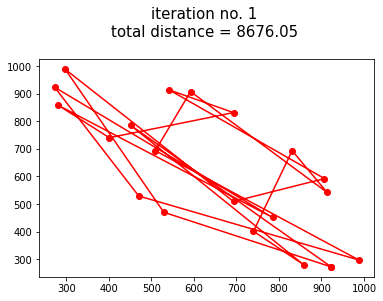

iteration =  1
total distance = 8676.05


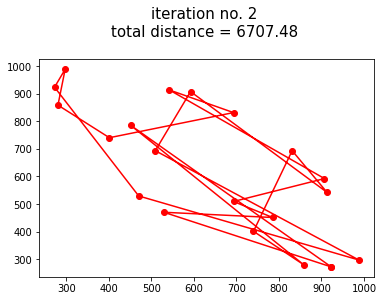

iteration =  2
total distance = 6707.48


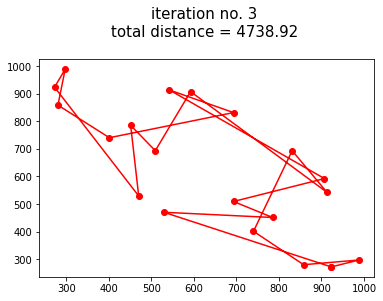

iteration =  3
total distance = 4738.92


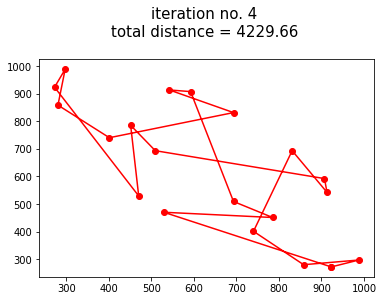

iteration =  4
total distance = 4229.66


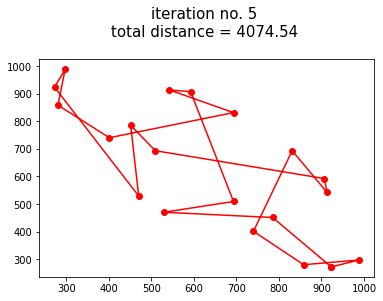

iteration =  5
total distance = 4074.54


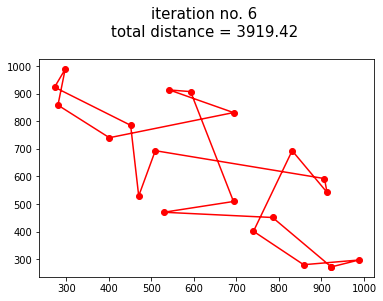

iteration =  6
total distance = 3919.42


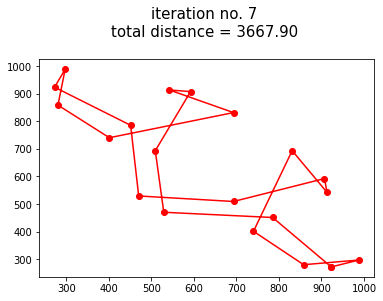

iteration =  7
total distance = 3667.90


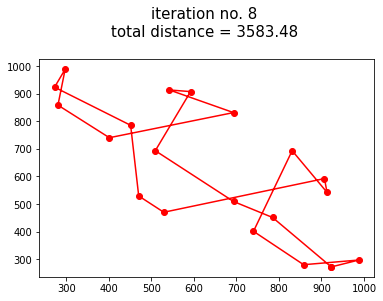

iteration =  8
total distance = 3583.48


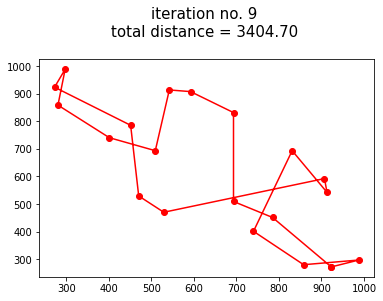

iteration =  9
total distance = 3404.70


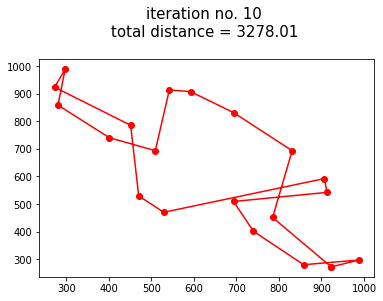

iteration =  10
total distance = 3278.01


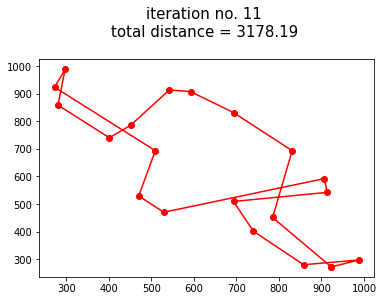

iteration =  11
total distance = 3178.19


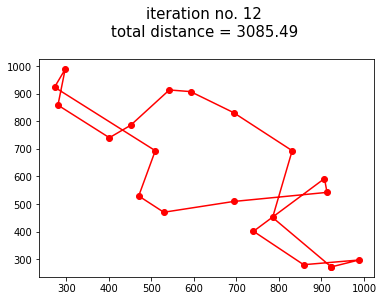

iteration =  12
total distance = 3085.49


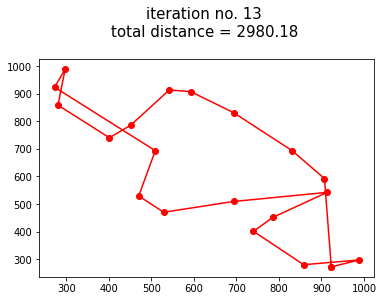

iteration =  13
total distance = 2980.18


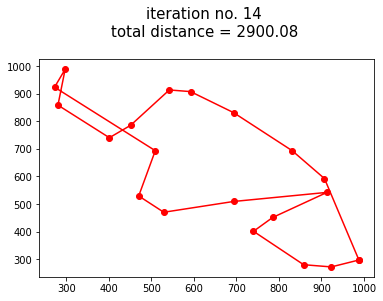

iteration =  14
total distance = 2900.08


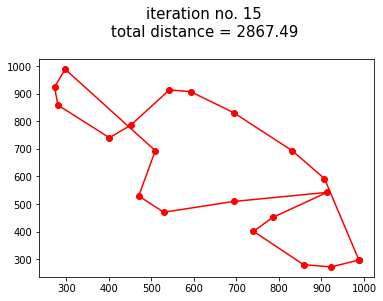

iteration =  15
total distance = 2867.49


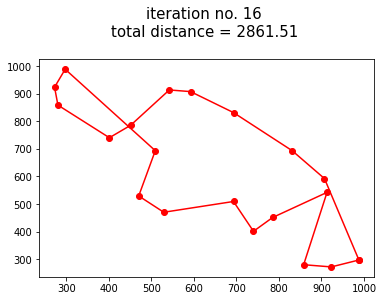

iteration =  16
total distance = 2861.51


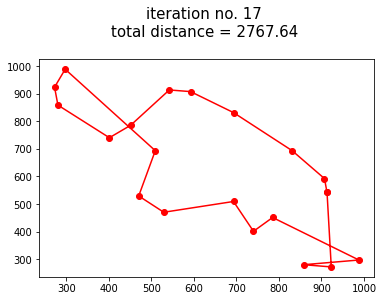

iteration =  17
total distance = 2767.64


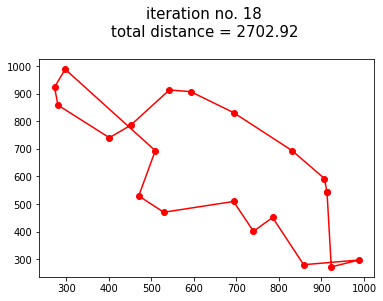

iteration =  18
total distance = 2702.92


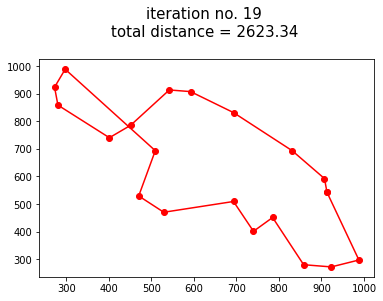

iteration =  19
total distance = 2623.34


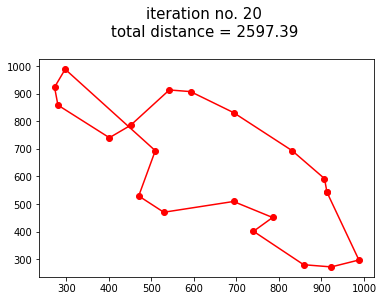

iteration =  20
total distance = 2597.39


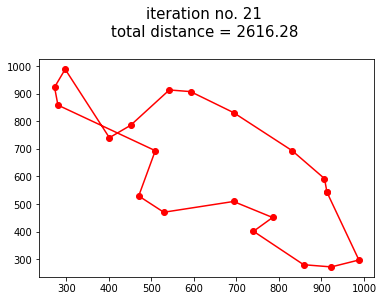

iteration =  21
total distance = 2616.28


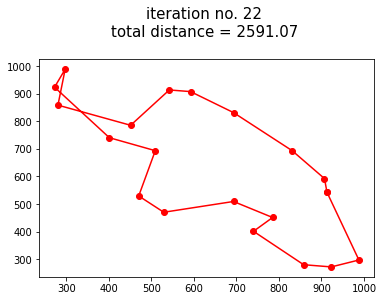

iteration =  22
total distance = 2591.07


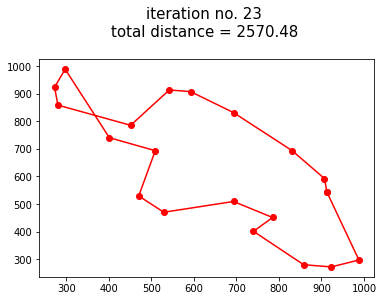

iteration =  23
total distance = 2570.48


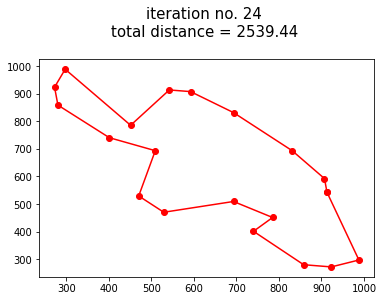

iteration =  24
total distance = 2539.44


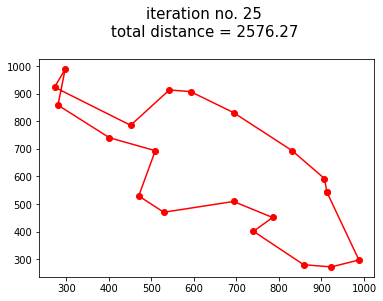

iteration =  25
total distance = 2576.27


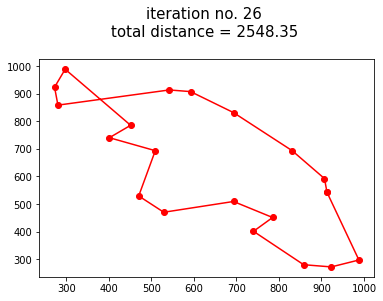

iteration =  26
total distance = 2548.35


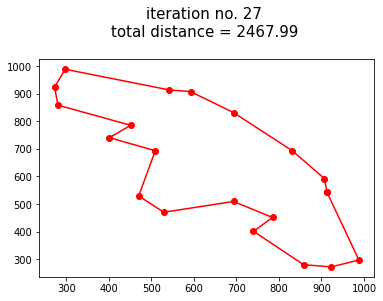

iteration =  27
total distance = 2467.99


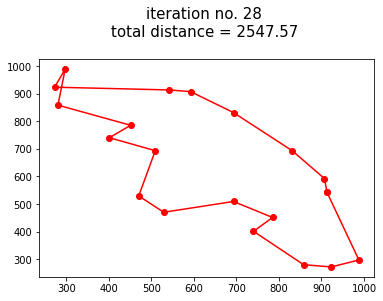

iteration =  28
total distance = 2547.57


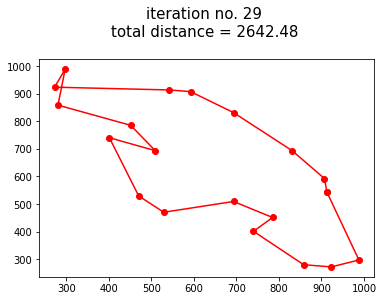

iteration =  29
total distance = 2642.48


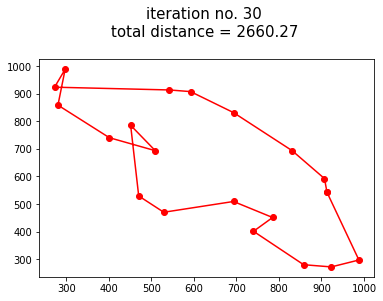

iteration =  30
total distance = 2660.27


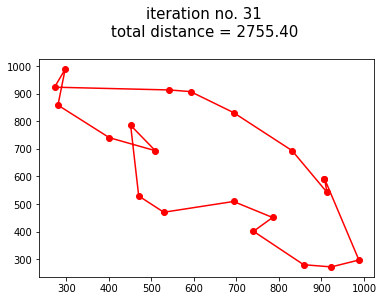

iteration =  31
total distance = 2755.40
popped


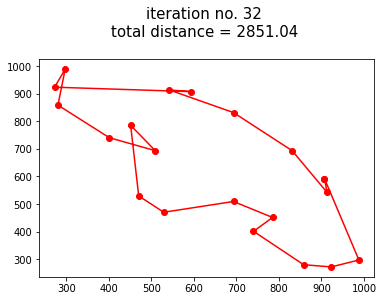

iteration =  32
total distance = 2851.04
popped


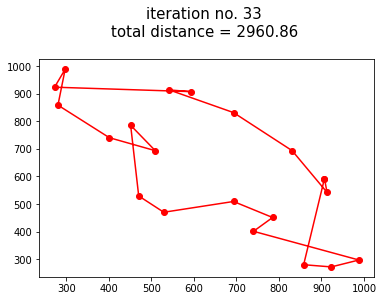

iteration =  33
total distance = 2960.86
popped


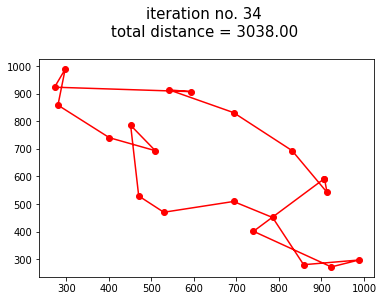

iteration =  34
total distance = 3038.00
popped


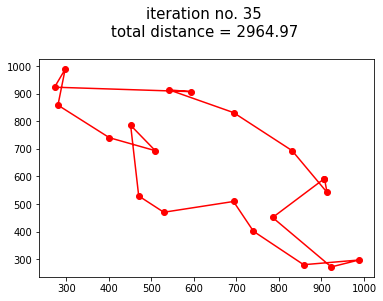

iteration =  35
total distance = 2964.97
popped


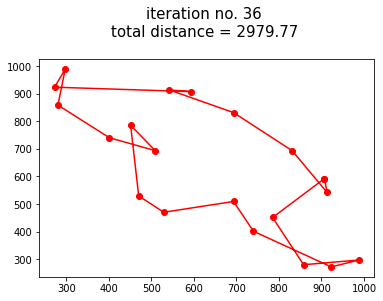

iteration =  36
total distance = 2979.77
popped


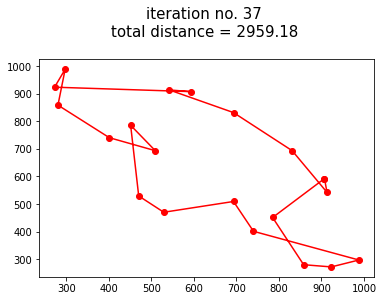

iteration =  37
total distance = 2959.18
popped


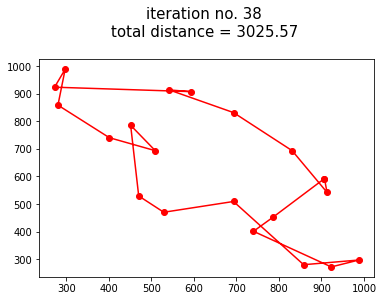

iteration =  38
total distance = 3025.57
popped


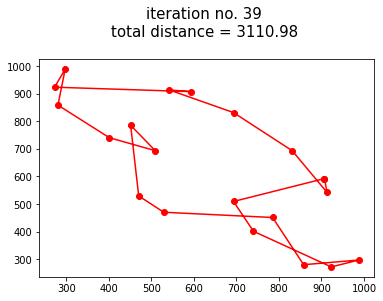

iteration =  39
total distance = 3110.98
popped


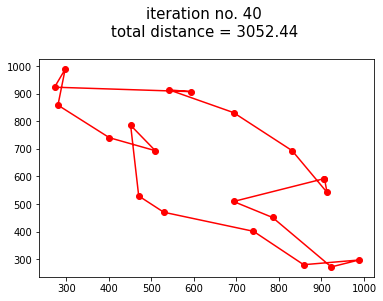

iteration =  40
total distance = 3052.44
popped


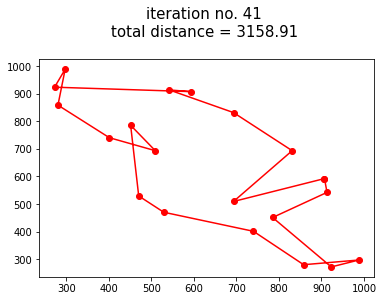

iteration =  41
total distance = 3158.91
popped


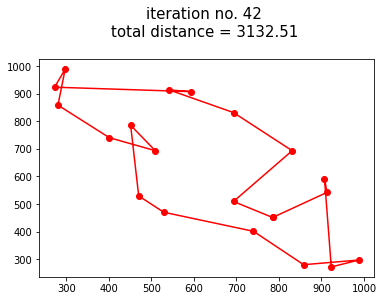

iteration =  42
total distance = 3132.51
popped


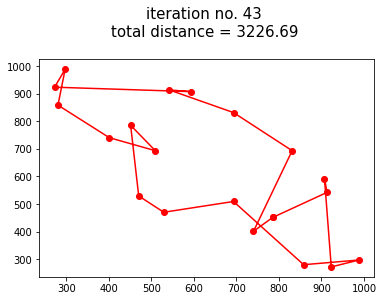

iteration =  43
total distance = 3226.69
popped


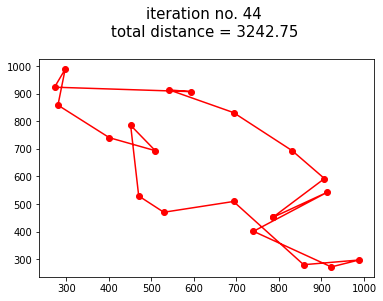

iteration =  44
total distance = 3242.75
popped


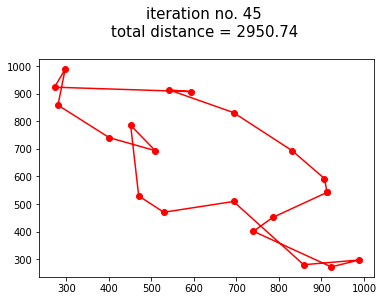

iteration =  45
total distance = 2950.74
popped


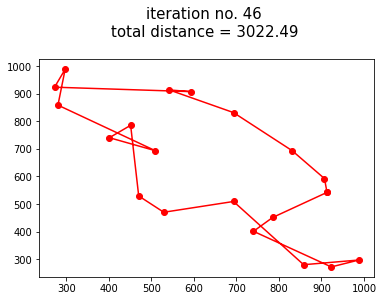

iteration =  46
total distance = 3022.49
popped


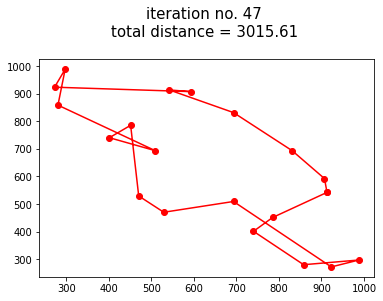

iteration =  47
total distance = 3015.61
popped


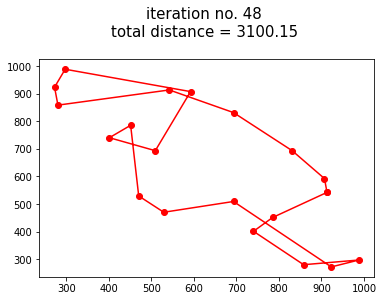

iteration =  48
total distance = 3100.15
popped


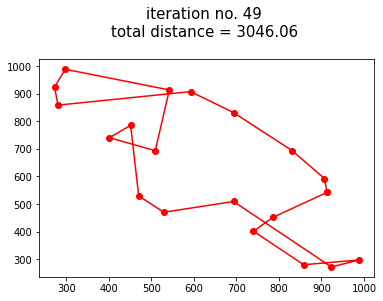

iteration =  49
total distance = 3046.06
popped


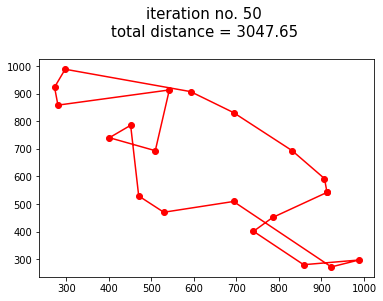

iteration =  50
total distance = 3047.65
popped


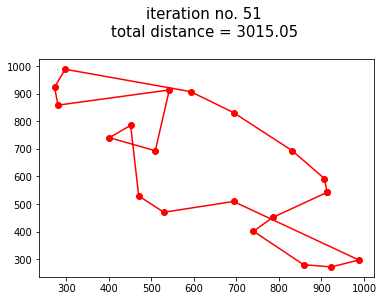

iteration =  51
total distance = 3015.05
popped


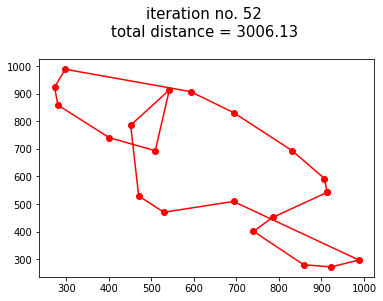

iteration =  52
total distance = 3006.13
popped


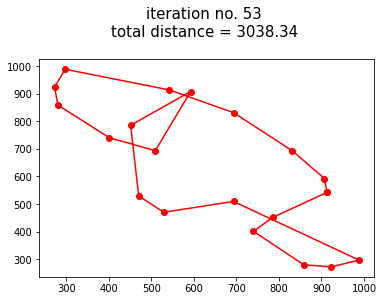

iteration =  53
total distance = 3038.34
popped


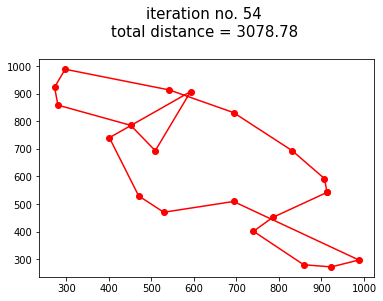

iteration =  54
total distance = 3078.78
popped


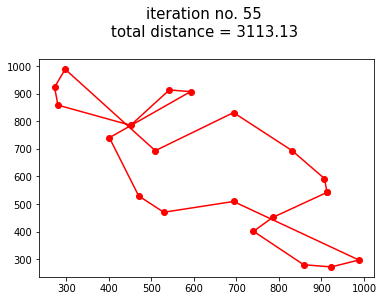

iteration =  55
total distance = 3113.13
popped


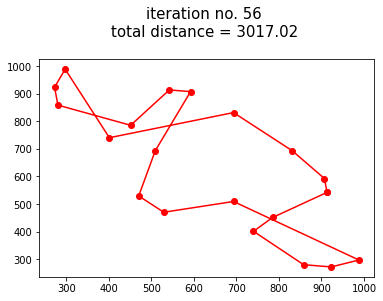

iteration =  56
total distance = 3017.02
popped


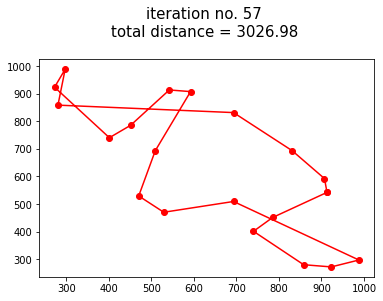

iteration =  57
total distance = 3026.98
popped


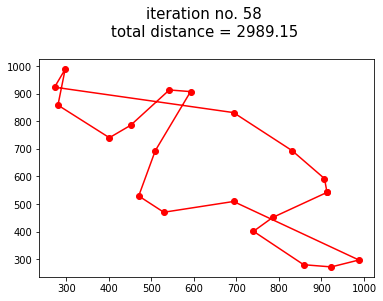

iteration =  58
total distance = 2989.15
popped


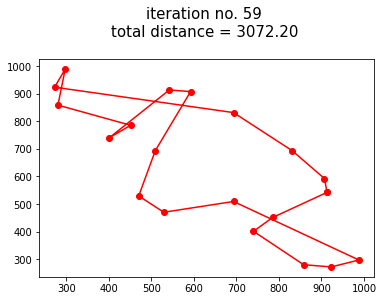

iteration =  59
total distance = 3072.20
popped


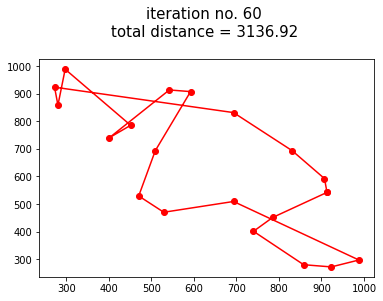

iteration =  60
total distance = 3136.92
popped


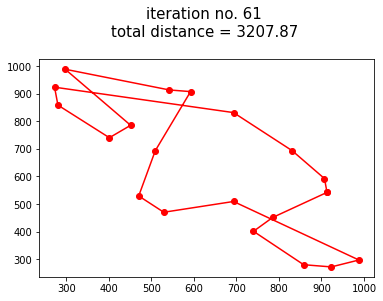

iteration =  61
total distance = 3207.87
popped


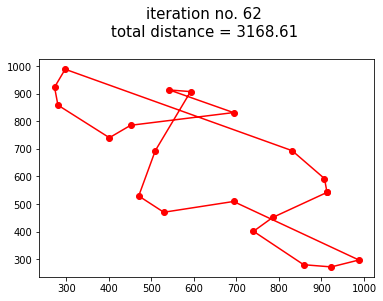

iteration =  62
total distance = 3168.61
popped


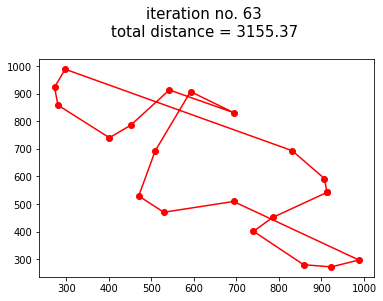

iteration =  63
total distance = 3155.37
popped


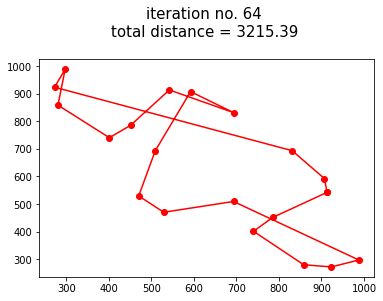

iteration =  64
total distance = 3215.39
popped


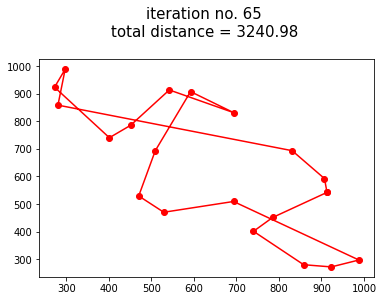

iteration =  65
total distance = 3240.98
popped


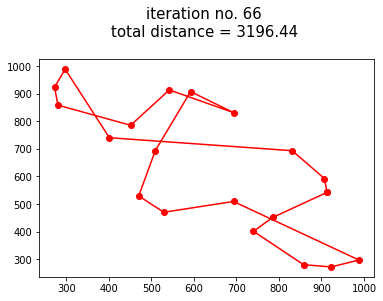

iteration =  66
total distance = 3196.44
popped


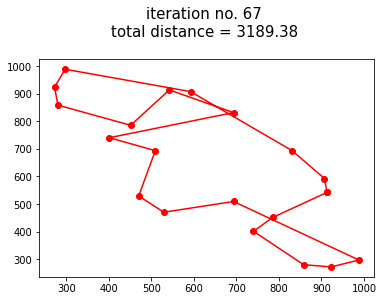

iteration =  67
total distance = 3189.38
popped


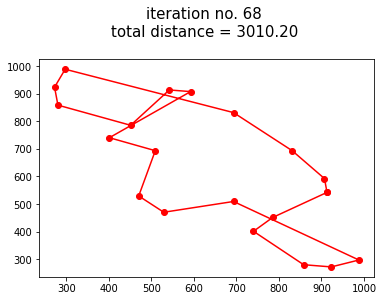

iteration =  68
total distance = 3010.20
popped


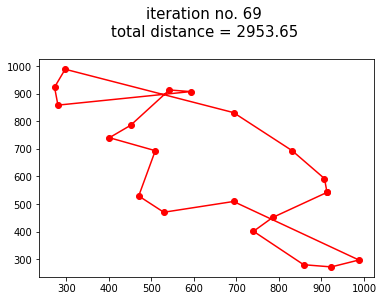

iteration =  69
total distance = 2953.65
popped


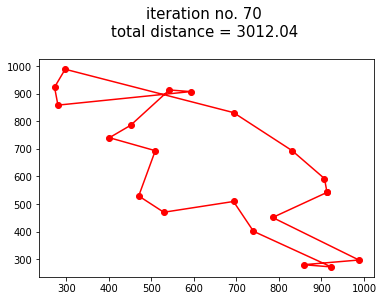

iteration =  70
total distance = 3012.04
popped


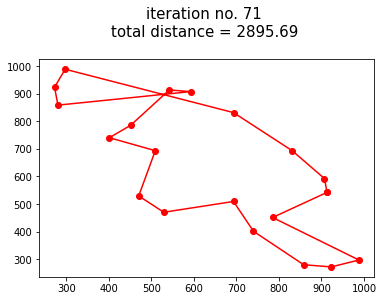

iteration =  71
total distance = 2895.69
popped


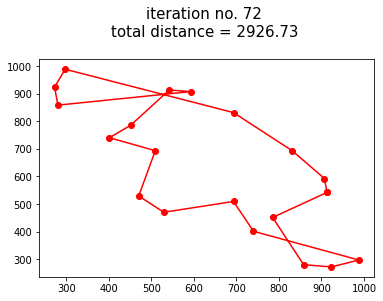

iteration =  72
total distance = 2926.73
popped


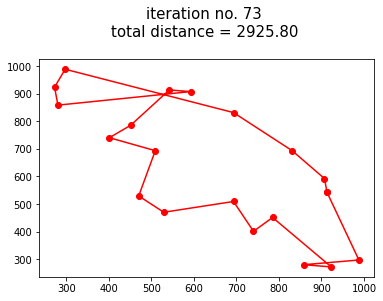

iteration =  73
total distance = 2925.80
popped


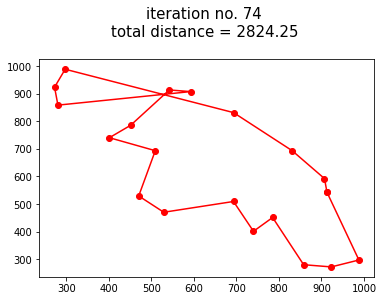

iteration =  74
total distance = 2824.25
popped


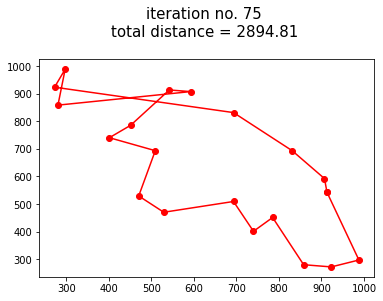

iteration =  75
total distance = 2894.81
popped


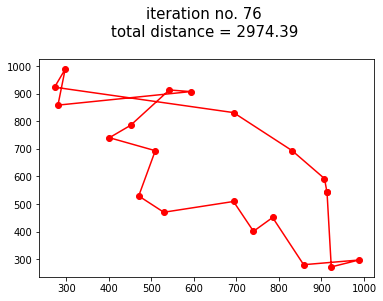

iteration =  76
total distance = 2974.39
popped


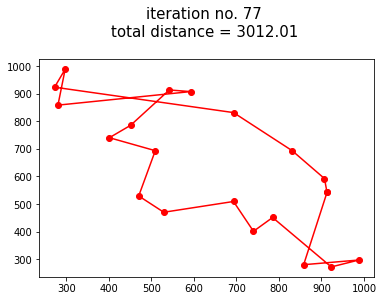

iteration =  77
total distance = 3012.01
popped


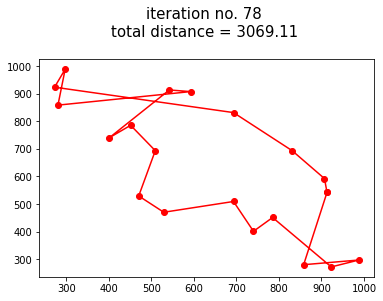

iteration =  78
total distance = 3069.11
popped


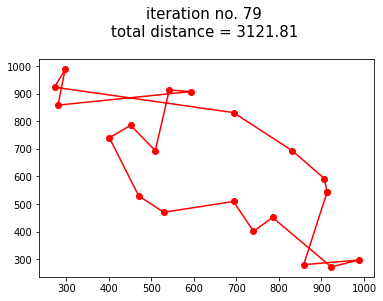

iteration =  79
total distance = 3121.81
popped


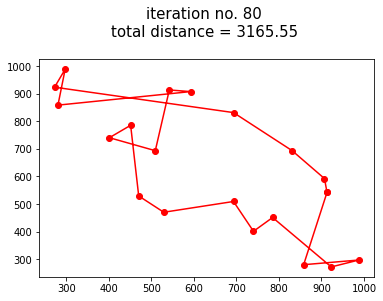

iteration =  80
total distance = 3165.55
popped


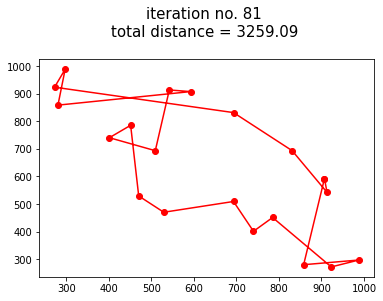

iteration =  81
total distance = 3259.09
popped


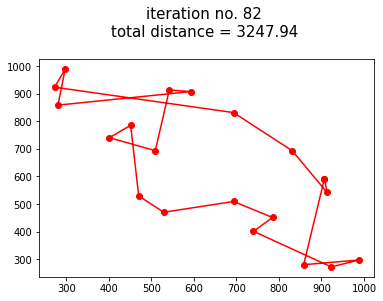

iteration =  82
total distance = 3247.94
popped


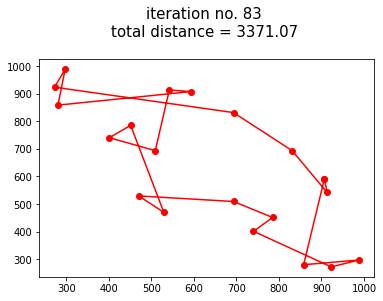

iteration =  83
total distance = 3371.07
popped


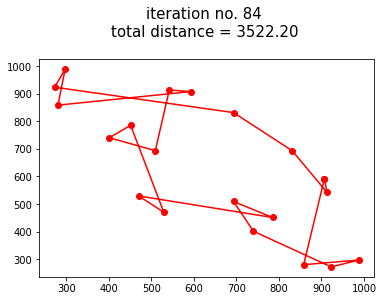

iteration =  84
total distance = 3522.20
popped


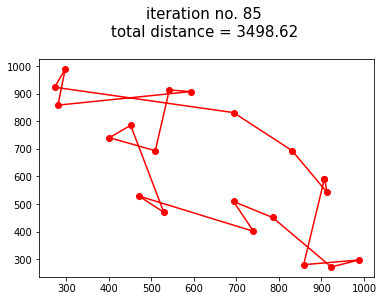

iteration =  85
total distance = 3498.62
popped


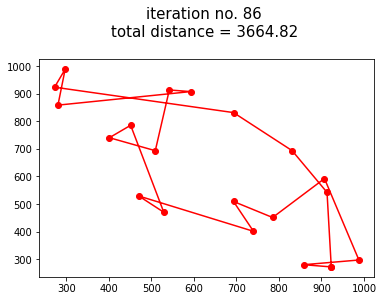

iteration =  86
total distance = 3664.82
popped


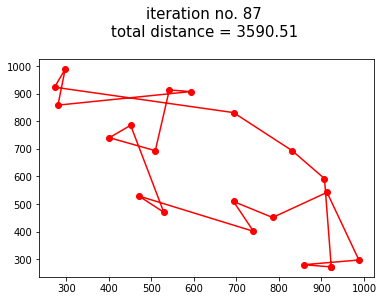

iteration =  87
total distance = 3590.51
popped


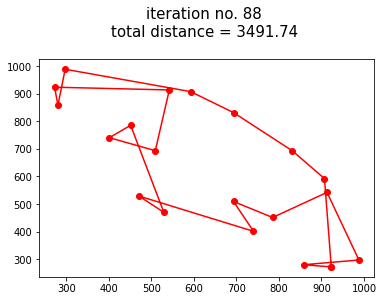

iteration =  88
total distance = 3491.74
popped


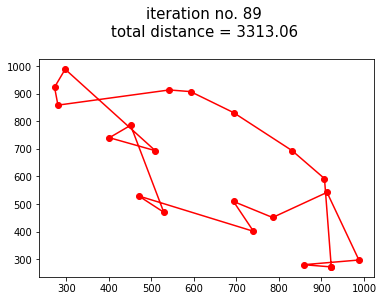

iteration =  89
total distance = 3313.06
popped


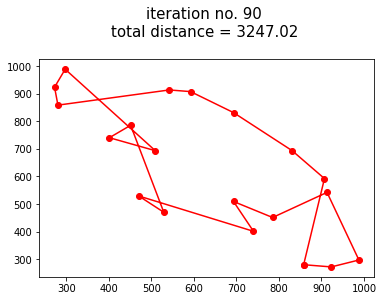

iteration =  90
total distance = 3247.02
popped


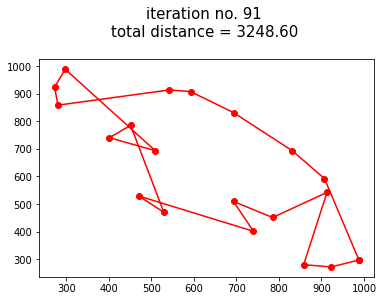

iteration =  91
total distance = 3248.60
popped


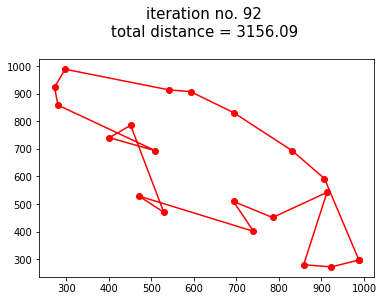

iteration =  92
total distance = 3156.09
popped


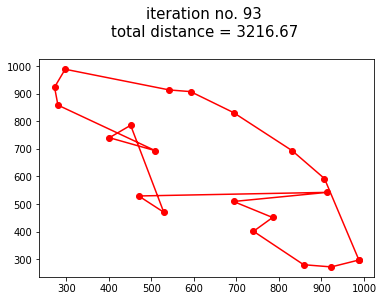

iteration =  93
total distance = 3216.67
popped


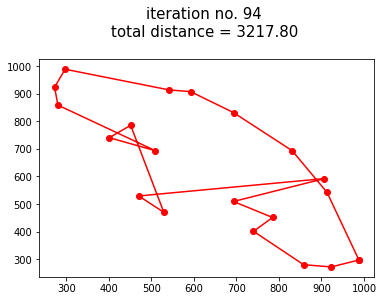

iteration =  94
total distance = 3217.80
popped


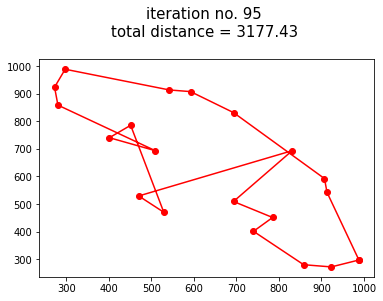

iteration =  95
total distance = 3177.43
popped


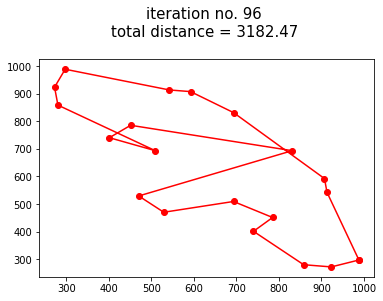

iteration =  96
total distance = 3182.47
popped


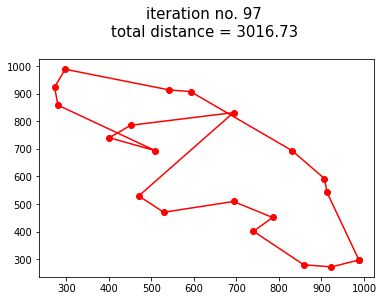

iteration =  97
total distance = 3016.73
popped


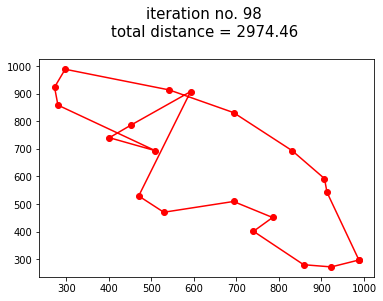

iteration =  98
total distance = 2974.46
popped


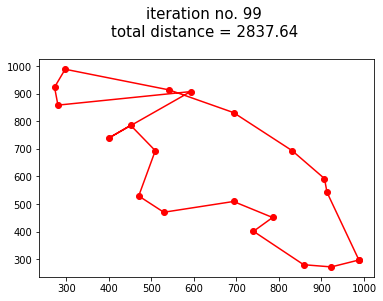

iteration =  99
total distance = 2837.64
popped


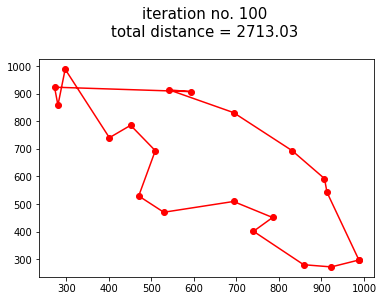

iteration =  100
total distance = 2713.03
popped


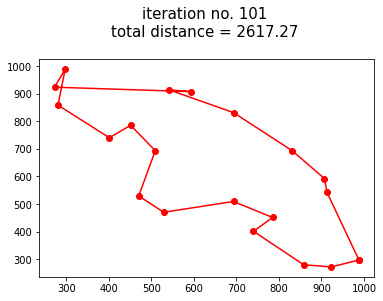

iteration =  101
total distance = 2617.27
popped


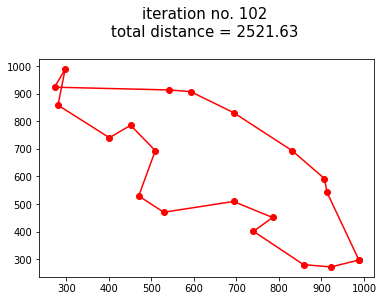

iteration =  102
total distance = 2521.63
popped


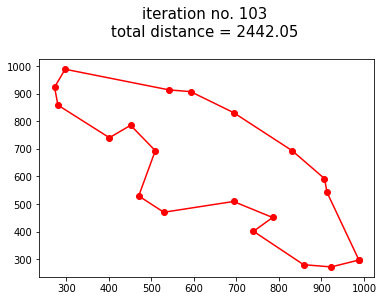

iteration =  103
total distance = 2442.05
popped


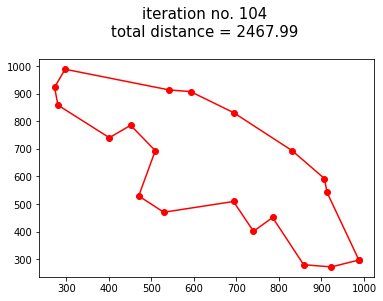

iteration =  104
total distance = 2467.99
popped


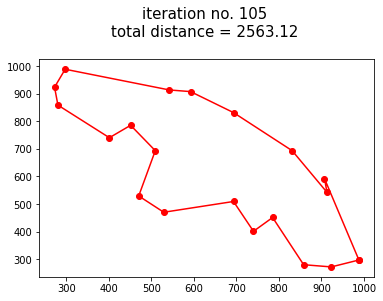

iteration =  105
total distance = 2563.12
popped


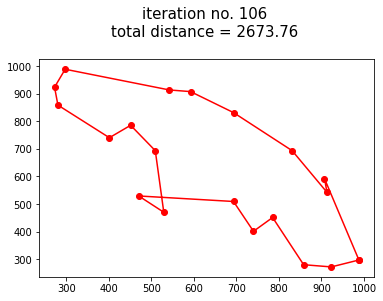

iteration =  106
total distance = 2673.76
popped


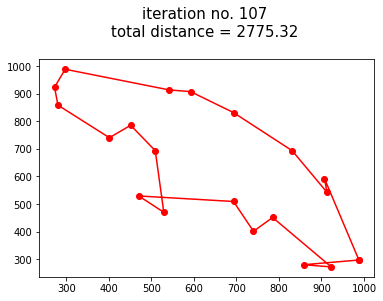

iteration =  107
total distance = 2775.32
popped


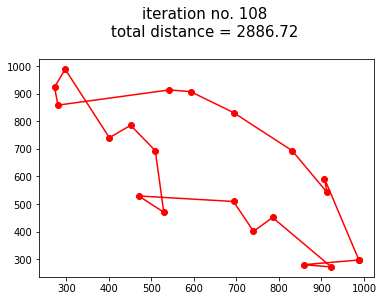

iteration =  108
total distance = 2886.72
popped


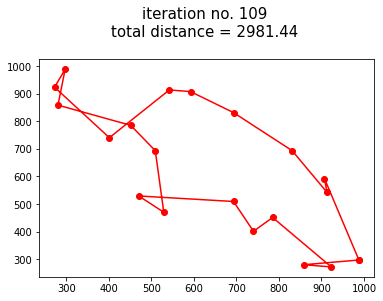

iteration =  109
total distance = 2981.44
popped


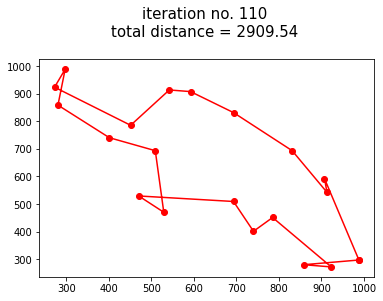

iteration =  110
total distance = 2909.54
popped


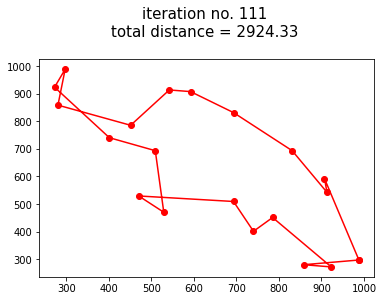

iteration =  111
total distance = 2924.33
popped


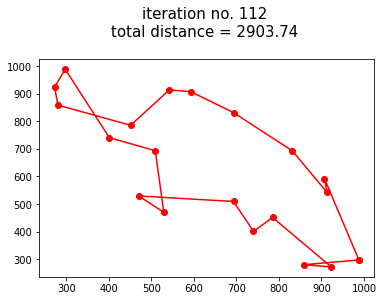

iteration =  112
total distance = 2903.74
popped


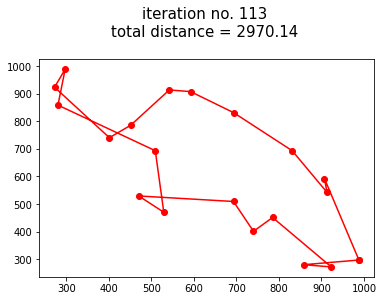

iteration =  113
total distance = 2970.14
popped


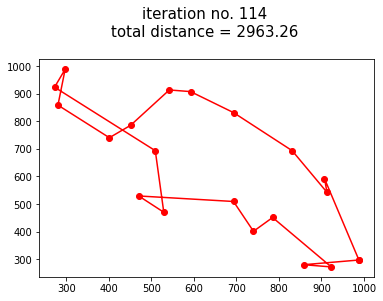

iteration =  114
total distance = 2963.26
popped


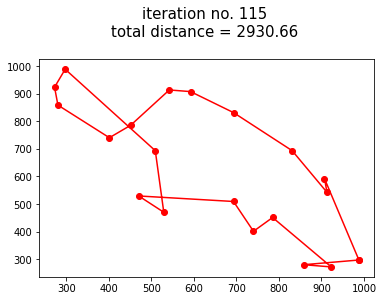

iteration =  115
total distance = 2930.66
popped


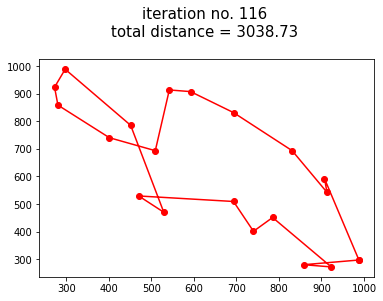

iteration =  116
total distance = 3038.73
popped


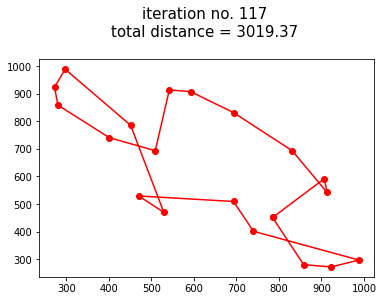

iteration =  117
total distance = 3019.37
popped


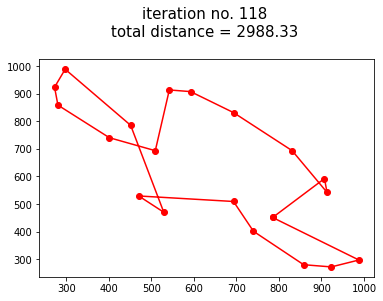

iteration =  118
total distance = 2988.33
popped


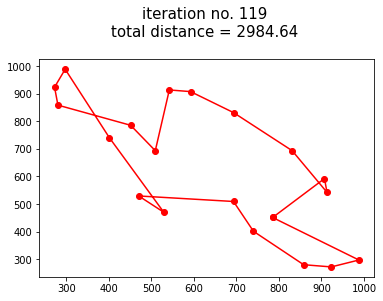

iteration =  119
total distance = 2984.64
popped


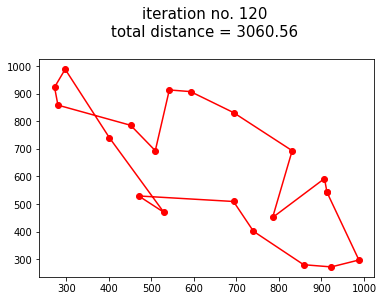

iteration =  120
total distance = 3060.56
popped


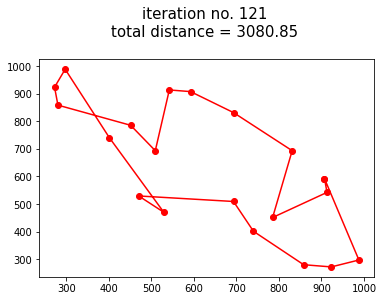

iteration =  121
total distance = 3080.85
popped


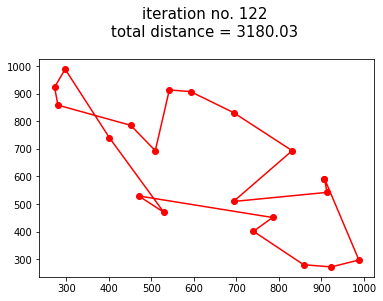

iteration =  122
total distance = 3180.03
popped


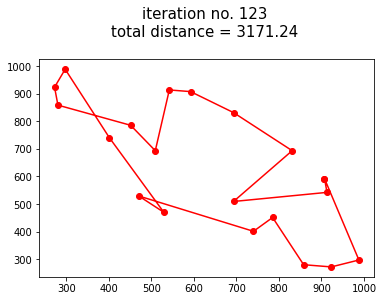

iteration =  123
total distance = 3171.24
popped


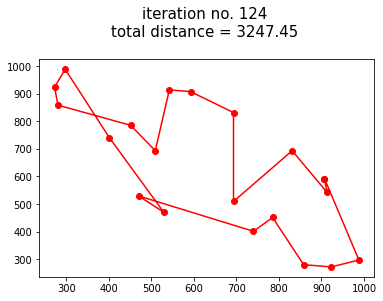

iteration =  124
total distance = 3247.45
popped


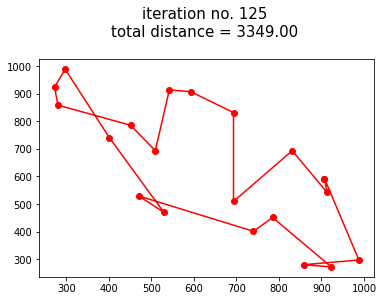

iteration =  125
total distance = 3349.00
popped


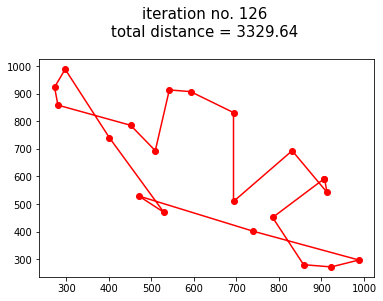

iteration =  126
total distance = 3329.64
popped


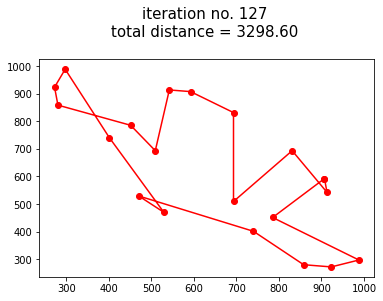

iteration =  127
total distance = 3298.60
popped


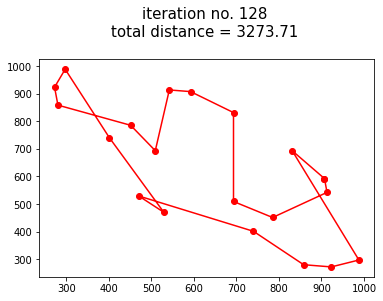

iteration =  128
total distance = 3273.71
popped


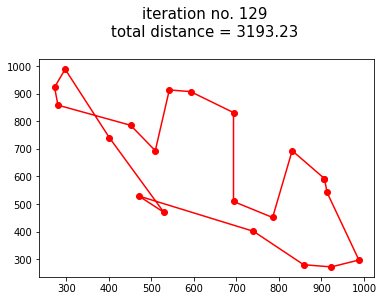

iteration =  129
total distance = 3193.23
popped


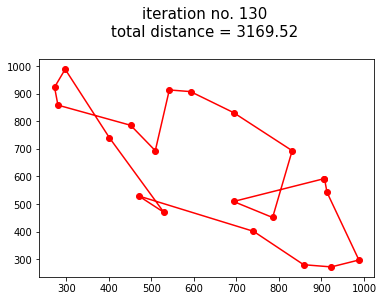

iteration =  130
total distance = 3169.52
popped


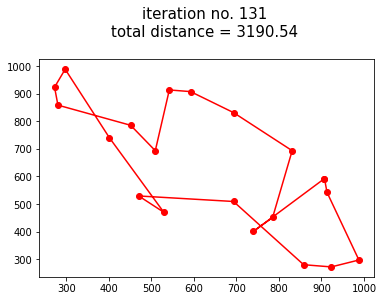

iteration =  131
total distance = 3190.54
popped


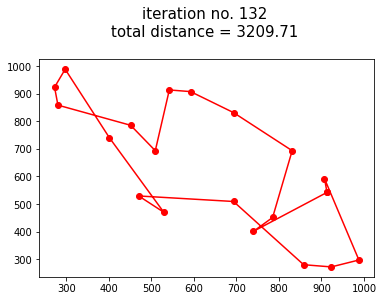

iteration =  132
total distance = 3209.71
popped


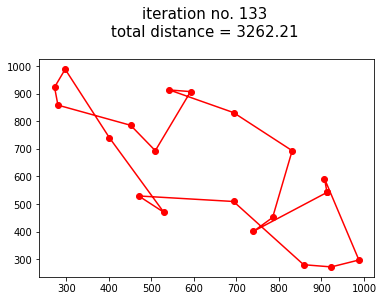

iteration =  133
total distance = 3262.21
popped


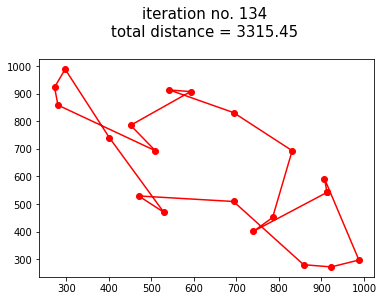

iteration =  134
total distance = 3315.45
popped


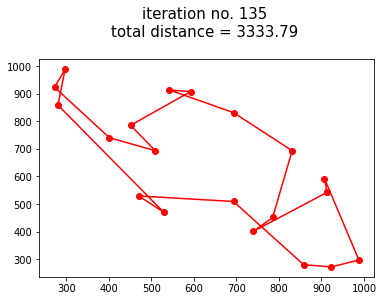

iteration =  135
total distance = 3333.79
popped


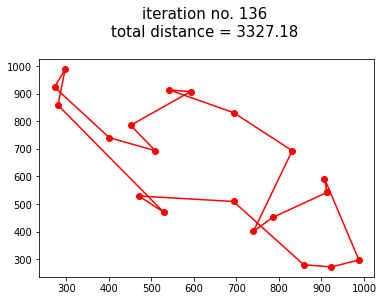

iteration =  136
total distance = 3327.18
popped


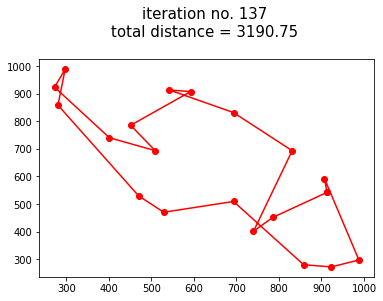

iteration =  137
total distance = 3190.75
popped


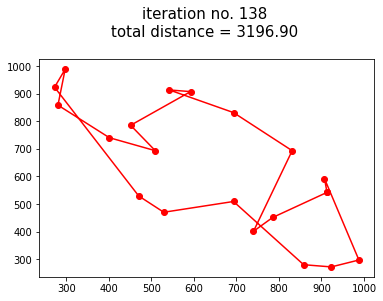

iteration =  138
total distance = 3196.90
popped


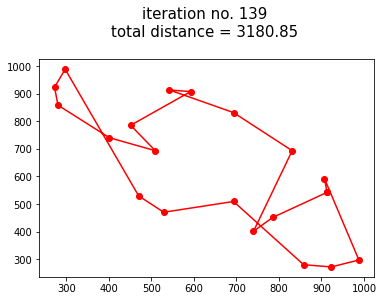

iteration =  139
total distance = 3180.85
popped


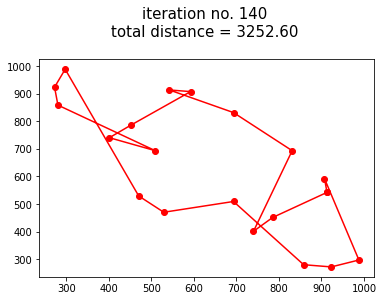

iteration =  140
total distance = 3252.60
popped


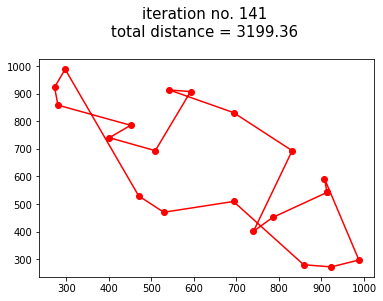

iteration =  141
total distance = 3199.36
popped


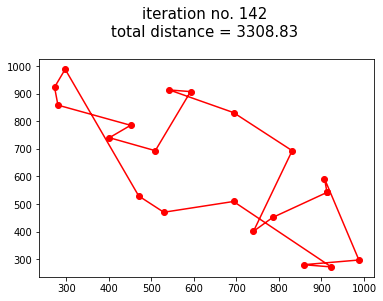

iteration =  142
total distance = 3308.83
popped


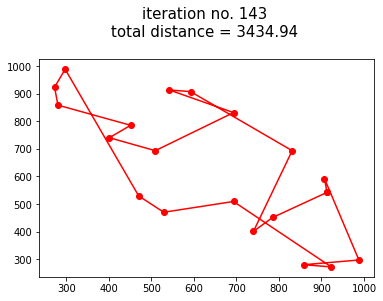

iteration =  143
total distance = 3434.94
popped


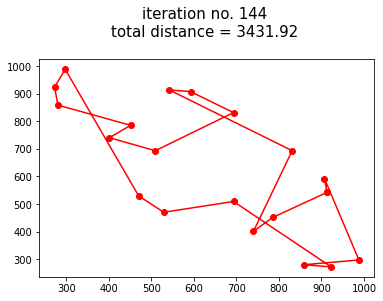

iteration =  144
total distance = 3431.92
popped


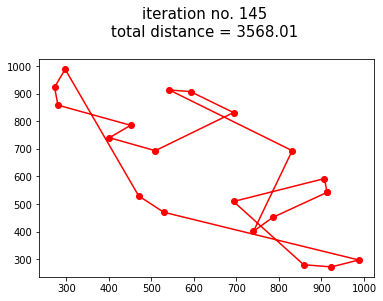

iteration =  145
total distance = 3568.01
popped


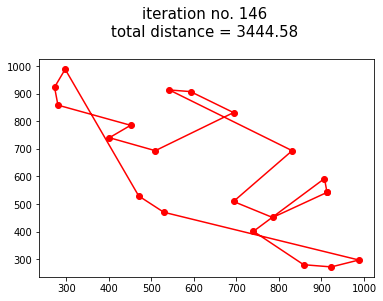

iteration =  146
total distance = 3444.58
popped


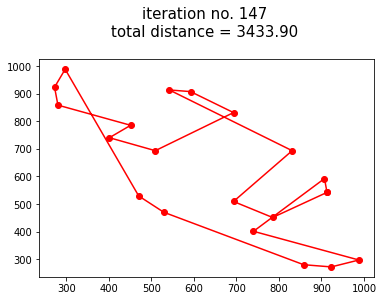

iteration =  147
total distance = 3433.90
popped


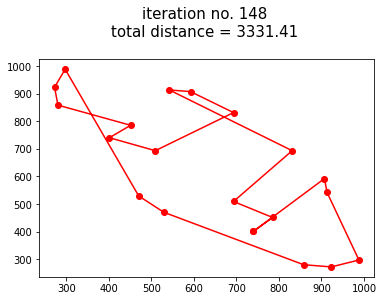

iteration =  148
total distance = 3331.41
popped


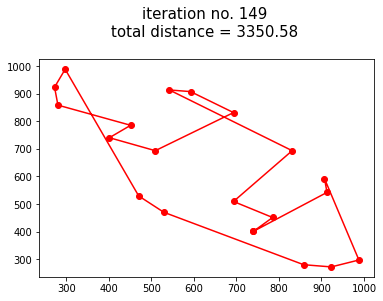

iteration =  149
total distance = 3350.58
popped


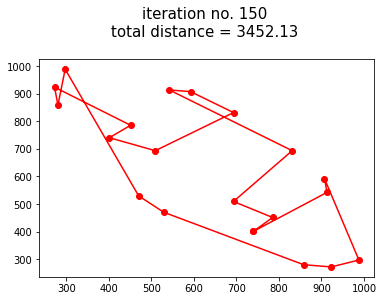

iteration =  150
total distance = 3452.13
popped


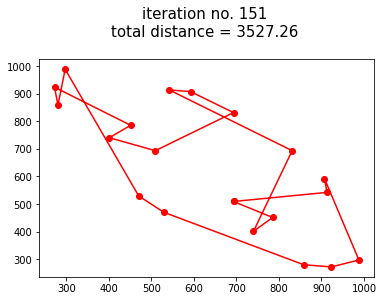

iteration =  151
total distance = 3527.26
popped


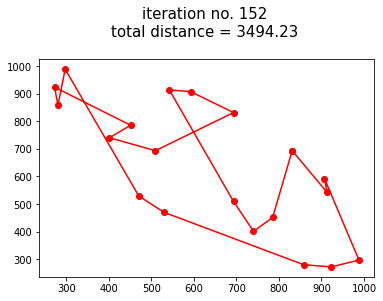

iteration =  152
total distance = 3494.23
popped


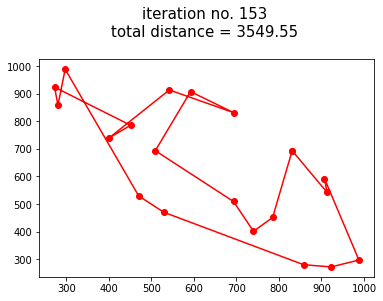

iteration =  153
total distance = 3549.55
popped


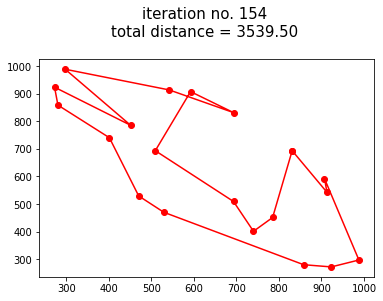

iteration =  154
total distance = 3539.50
popped


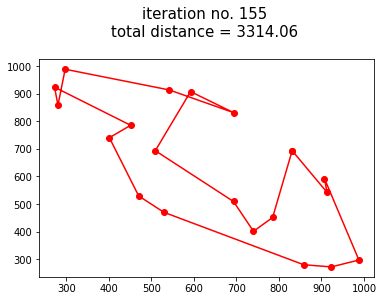

iteration =  155
total distance = 3314.06
popped


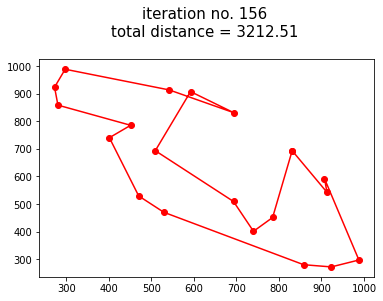

iteration =  156
total distance = 3212.51
popped


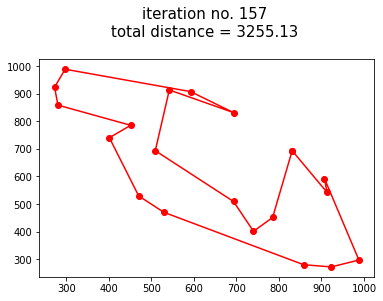

iteration =  157
total distance = 3255.13
popped


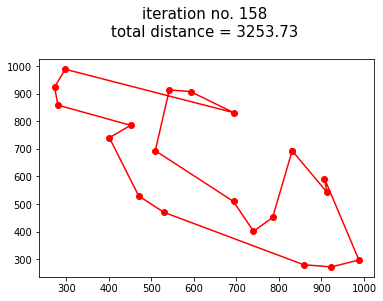

iteration =  158
total distance = 3253.73
popped


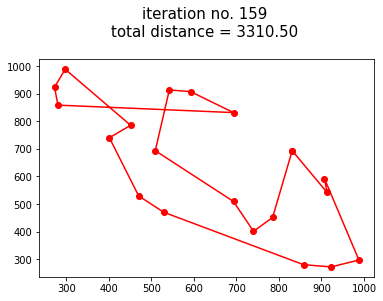

iteration =  159
total distance = 3310.50
popped


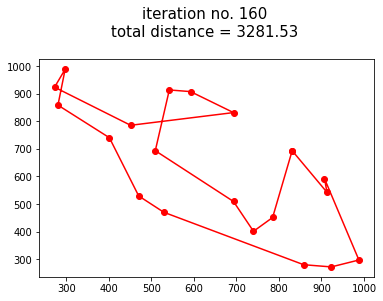

iteration =  160
total distance = 3281.53
popped


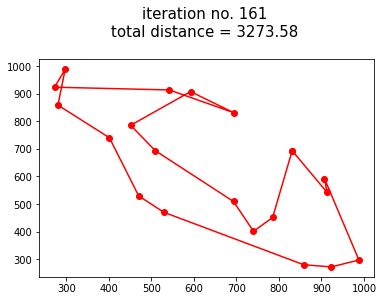

iteration =  161
total distance = 3273.58
popped


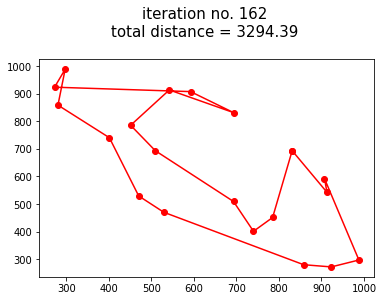

iteration =  162
total distance = 3294.39
popped


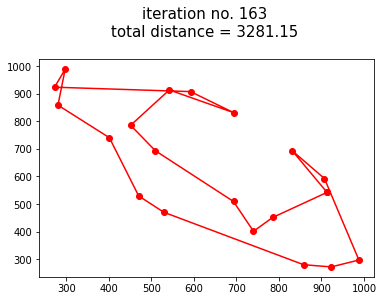

iteration =  163
total distance = 3281.15
popped


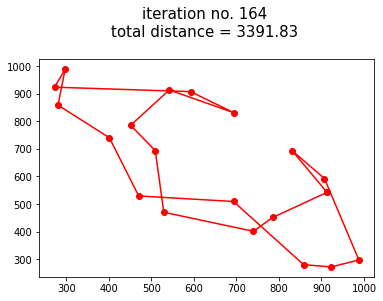

iteration =  164
total distance = 3391.83
popped


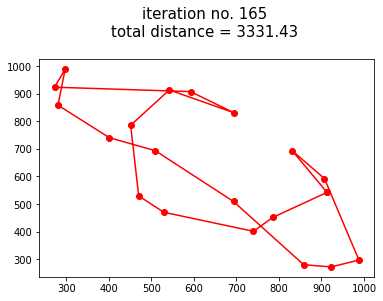

iteration =  165
total distance = 3331.43
popped


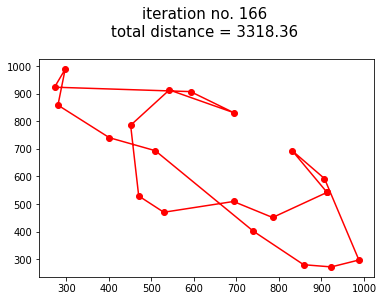

iteration =  166
total distance = 3318.36
popped


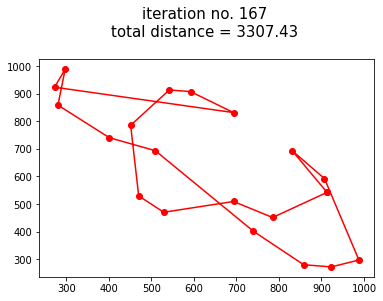

iteration =  167
total distance = 3307.43
popped


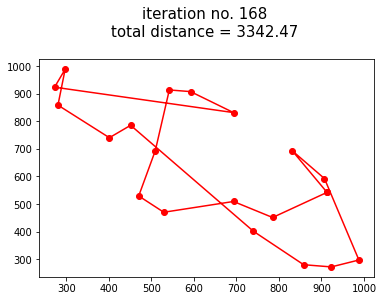

iteration =  168
total distance = 3342.47
popped


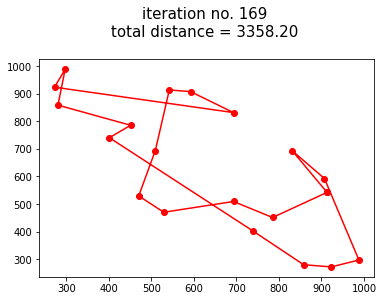

iteration =  169
total distance = 3358.20
popped


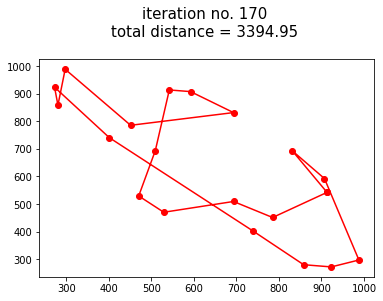

iteration =  170
total distance = 3394.95
popped


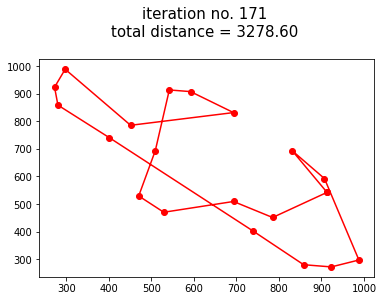

iteration =  171
total distance = 3278.60
popped


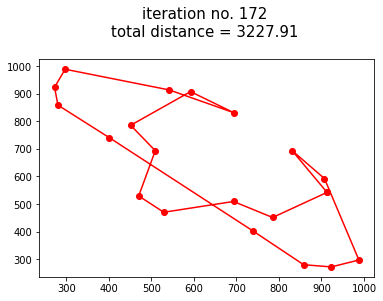

iteration =  172
total distance = 3227.91
popped


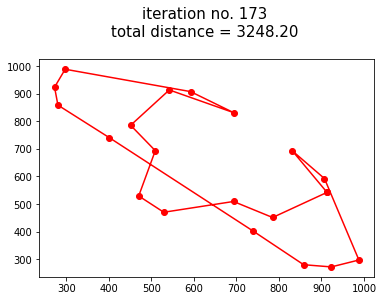

iteration =  173
total distance = 3248.20
popped


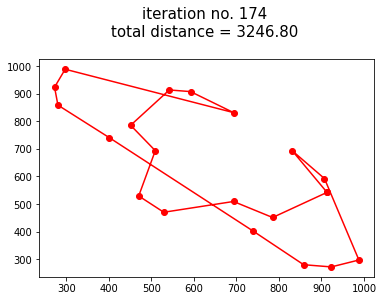

iteration =  174
total distance = 3246.80
popped


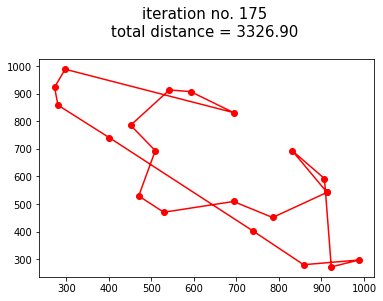

iteration =  175
total distance = 3326.90
popped


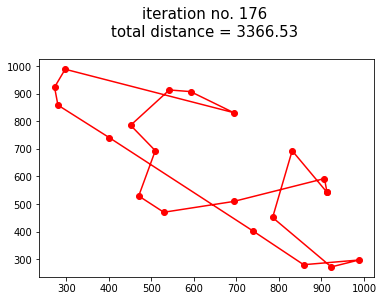

iteration =  176
total distance = 3366.53
popped


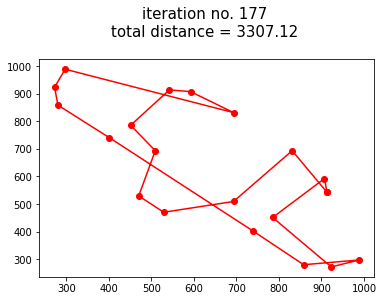

iteration =  177
total distance = 3307.12
popped


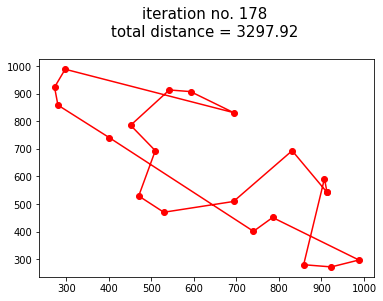

iteration =  178
total distance = 3297.92
popped


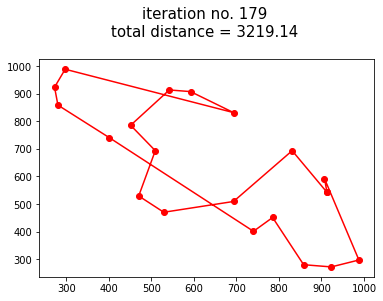

iteration =  179
total distance = 3219.14
popped


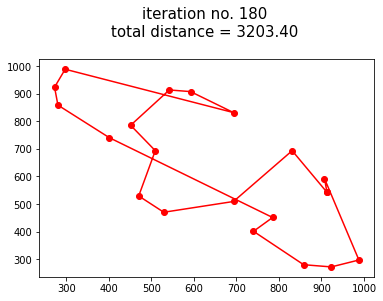

iteration =  180
total distance = 3203.40
popped


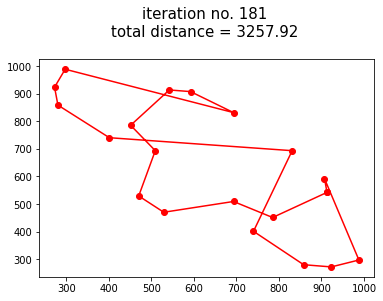

iteration =  181
total distance = 3257.92
popped


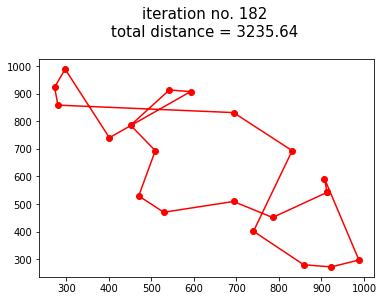

iteration =  182
total distance = 3235.64
popped


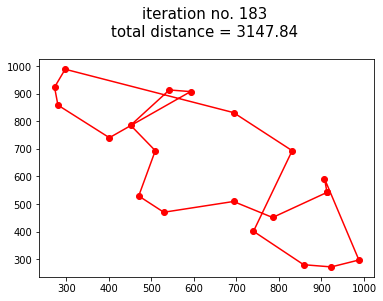

iteration =  183
total distance = 3147.84
popped


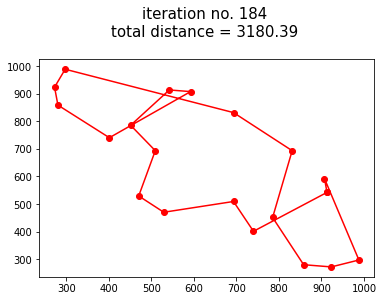

iteration =  184
total distance = 3180.39
popped


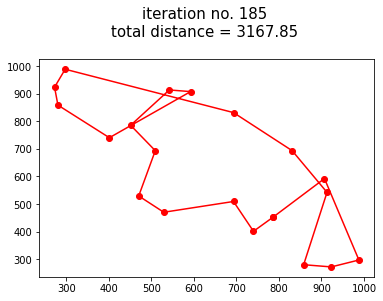

iteration =  185
total distance = 3167.85
popped


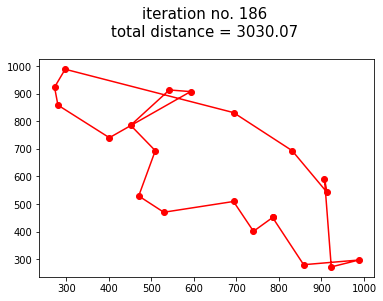

iteration =  186
total distance = 3030.07
popped


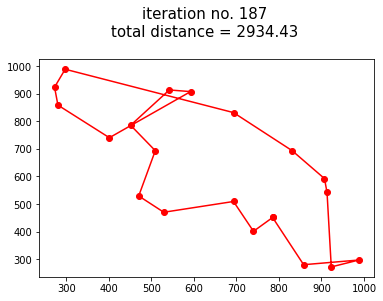

iteration =  187
total distance = 2934.43
popped


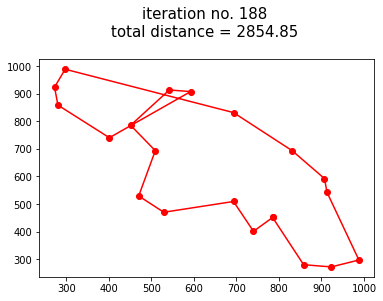

iteration =  188
total distance = 2854.85
popped


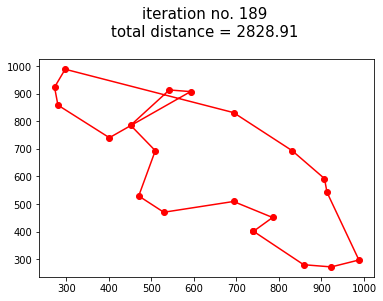

iteration =  189
total distance = 2828.91
popped


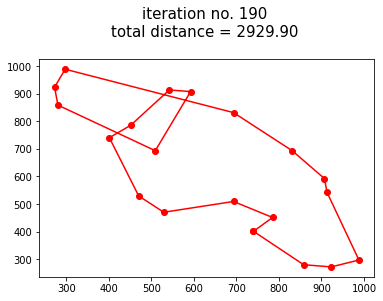

iteration =  190
total distance = 2929.90
popped


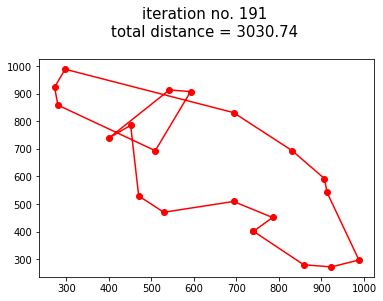

iteration =  191
total distance = 3030.74
popped


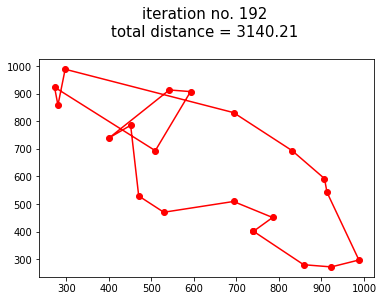

iteration =  192
total distance = 3140.21
popped


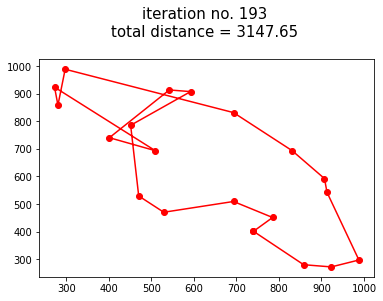

iteration =  193
total distance = 3147.65
popped


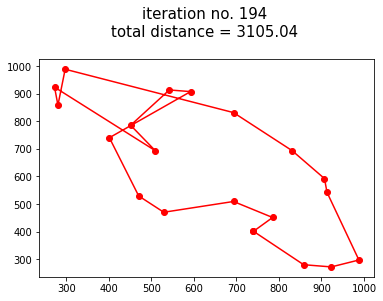

iteration =  194
total distance = 3105.04
popped


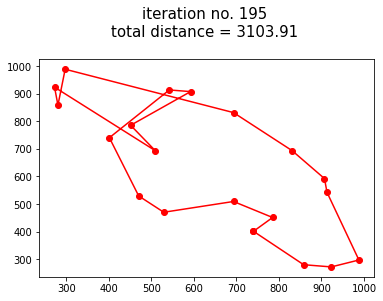

iteration =  195
total distance = 3103.91
popped


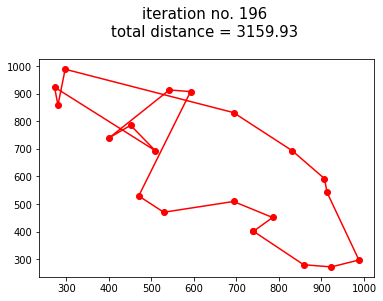

iteration =  196
total distance = 3159.93
popped


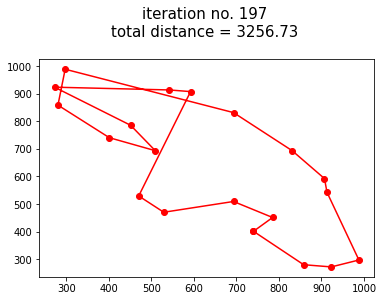

iteration =  197
total distance = 3256.73
popped


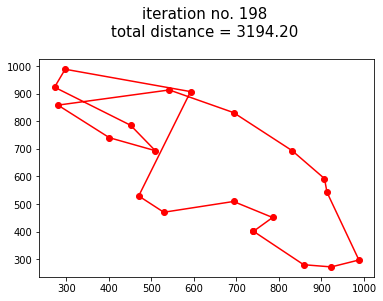

iteration =  198
total distance = 3194.20
popped


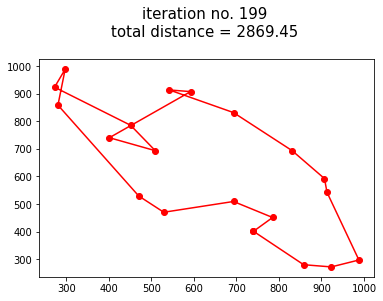

iteration =  199
total distance = 2869.45
popped


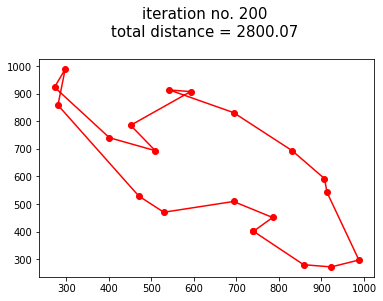

iteration =  200
total distance = 2800.07
popped


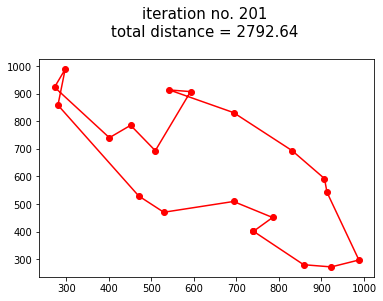

iteration =  201
total distance = 2792.64
popped


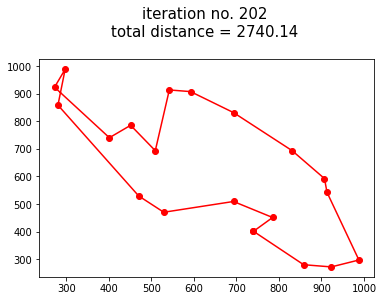

iteration =  202
total distance = 2740.14
popped


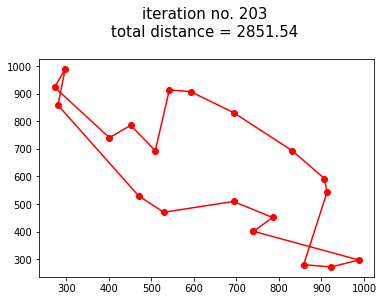

iteration =  203
total distance = 2851.54
popped


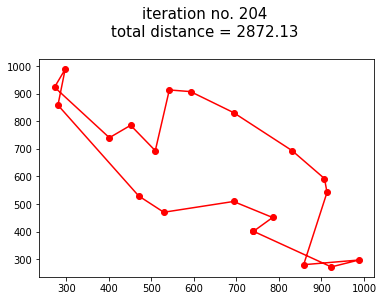

iteration =  204
total distance = 2872.13
popped


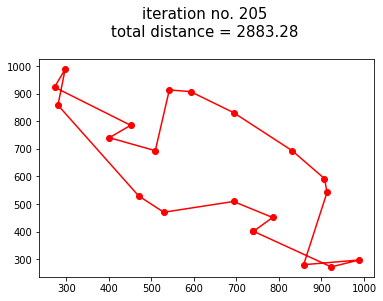

iteration =  205
total distance = 2883.28
popped


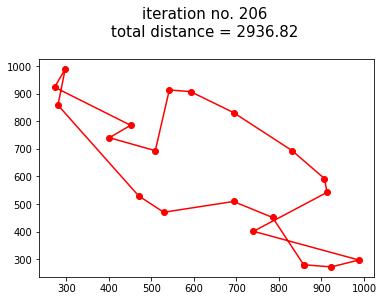

iteration =  206
total distance = 2936.82
popped


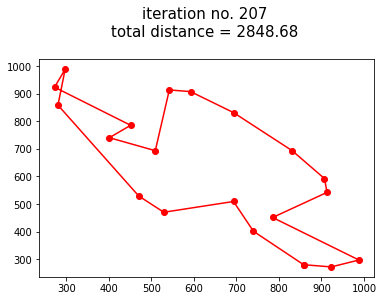

iteration =  207
total distance = 2848.68
popped


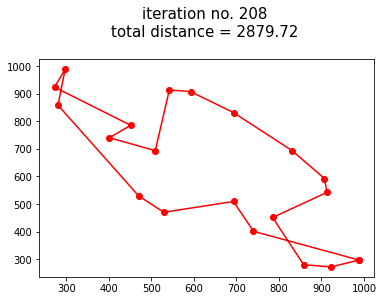

iteration =  208
total distance = 2879.72
popped


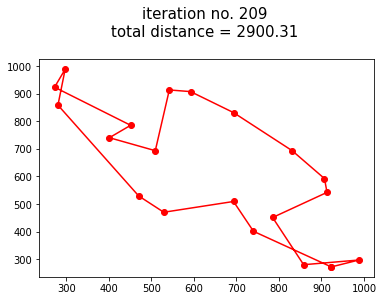

iteration =  209
total distance = 2900.31
popped


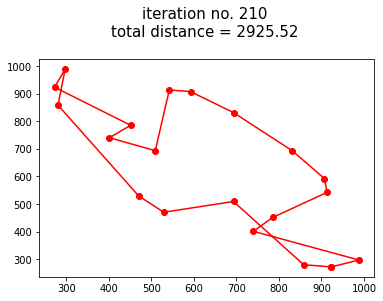

iteration =  210
total distance = 2925.52
popped


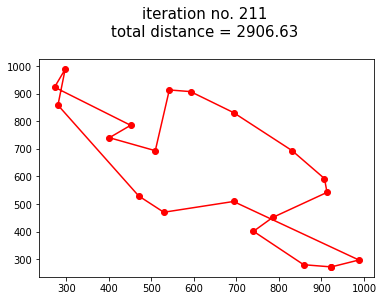

iteration =  211
total distance = 2906.63
popped


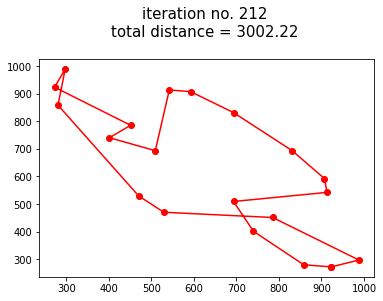

iteration =  212
total distance = 3002.22
popped


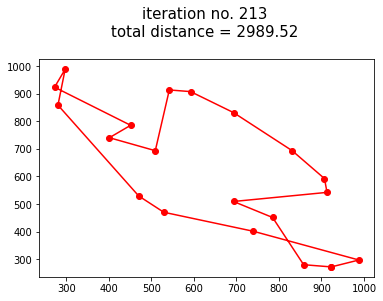

iteration =  213
total distance = 2989.52
popped


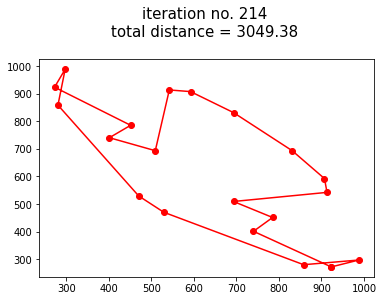

iteration =  214
total distance = 3049.38
popped


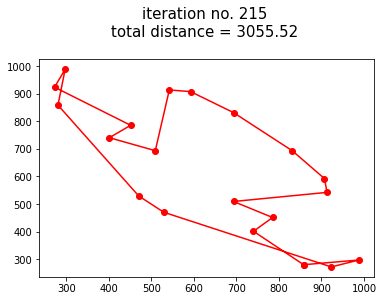

iteration =  215
total distance = 3055.52
popped


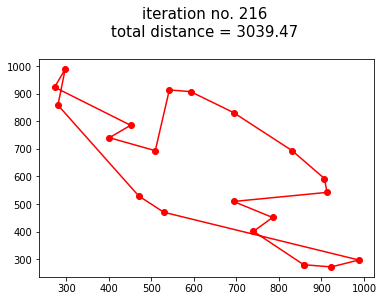

iteration =  216
total distance = 3039.47
popped


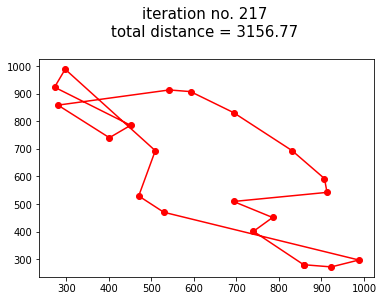

iteration =  217
total distance = 3156.77
popped


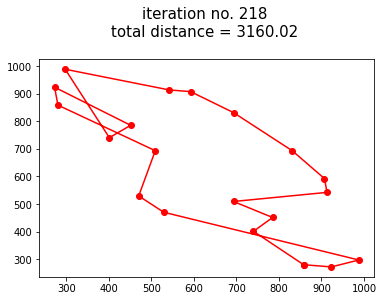

iteration =  218
total distance = 3160.02
popped


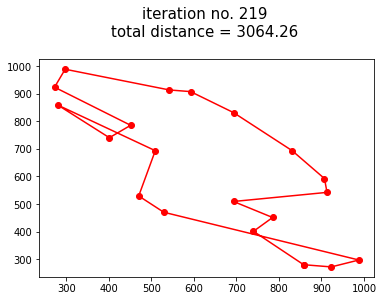

iteration =  219
total distance = 3064.26
popped


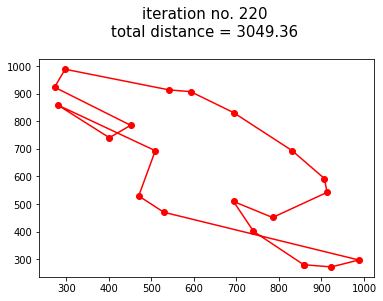

iteration =  220
total distance = 3049.36
popped


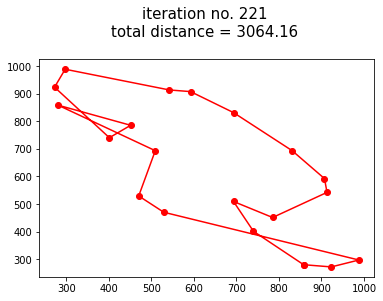

iteration =  221
total distance = 3064.16
popped


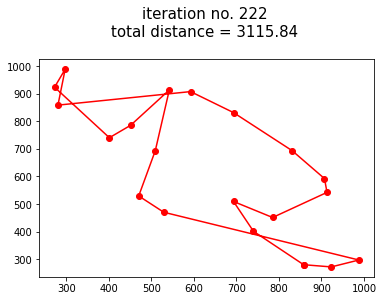

iteration =  222
total distance = 3115.84
popped


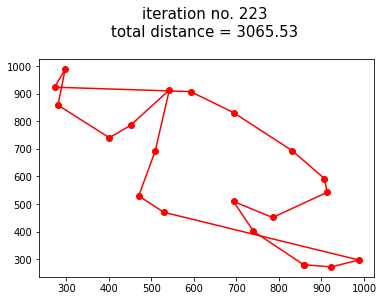

iteration =  223
total distance = 3065.53
popped


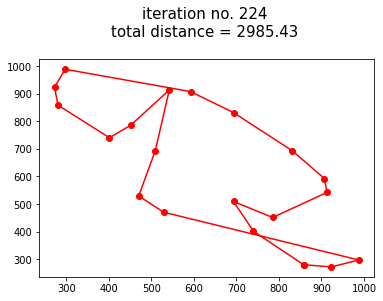

iteration =  224
total distance = 2985.43
popped


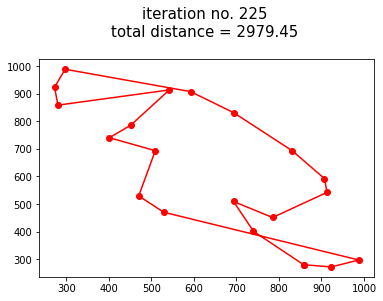

iteration =  225
total distance = 2979.45
popped


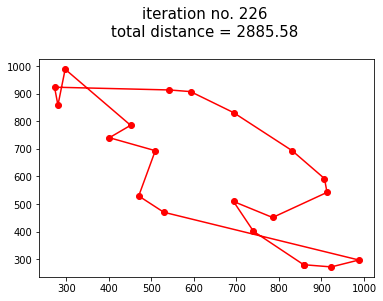

iteration =  226
total distance = 2885.58
popped


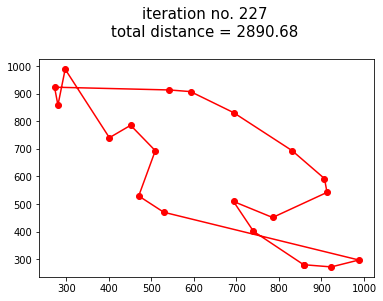

iteration =  227
total distance = 2890.68
popped


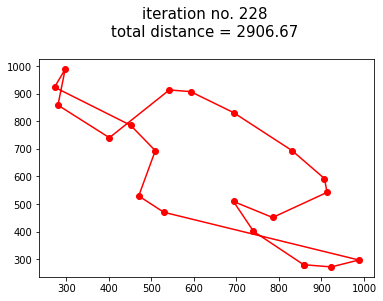

iteration =  228
total distance = 2906.67
popped


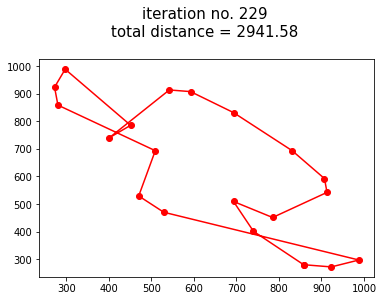

iteration =  229
total distance = 2941.58
popped


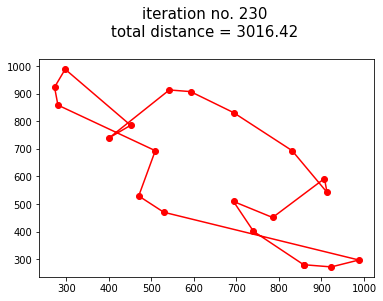

iteration =  230
total distance = 3016.42
popped


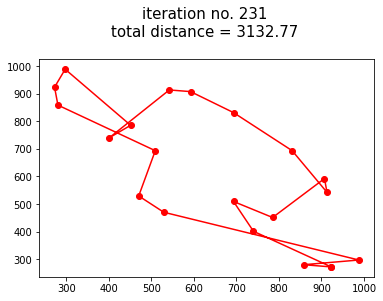

iteration =  231
total distance = 3132.77
popped


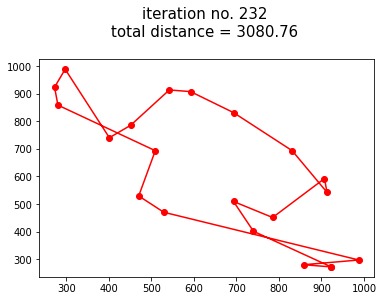

iteration =  232
total distance = 3080.76
popped


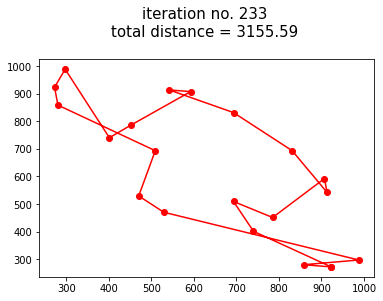

iteration =  233
total distance = 3155.59
popped


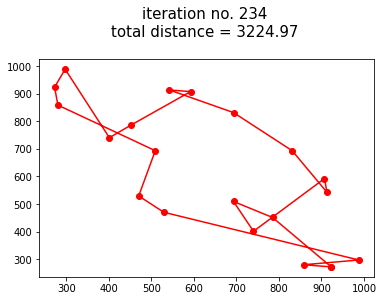

iteration =  234
total distance = 3224.97
popped


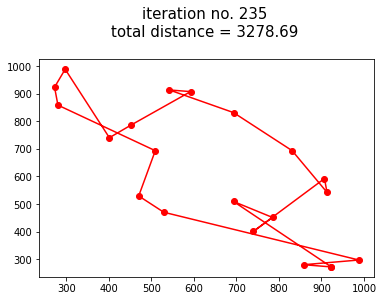

iteration =  235
total distance = 3278.69
popped


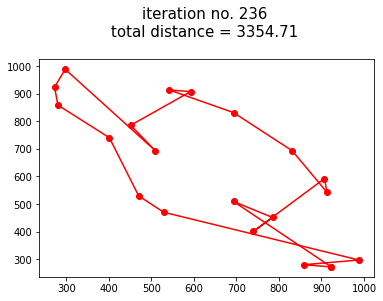

iteration =  236
total distance = 3354.71
popped


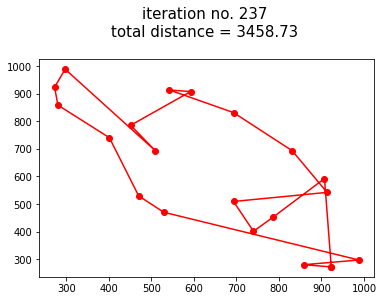

iteration =  237
total distance = 3458.73
popped


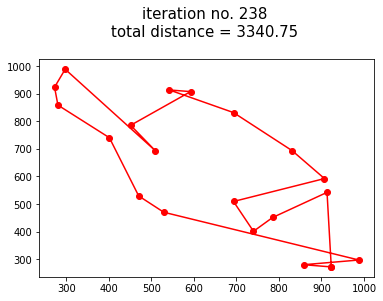

iteration =  238
total distance = 3340.75
popped


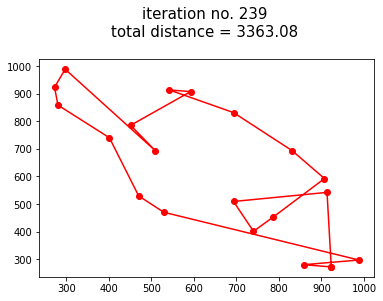

iteration =  239
total distance = 3363.08
popped


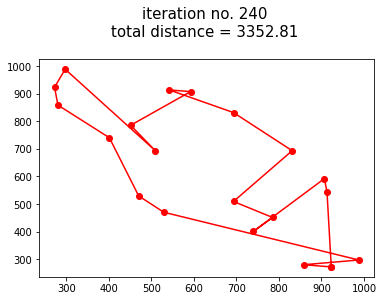

iteration =  240
total distance = 3352.81
popped


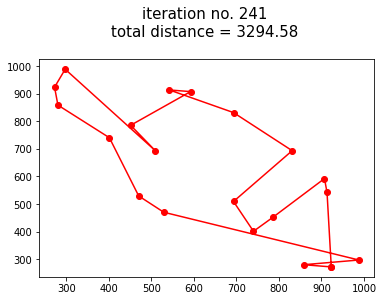

iteration =  241
total distance = 3294.58
popped


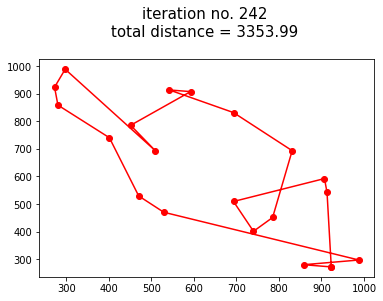

iteration =  242
total distance = 3353.99
popped


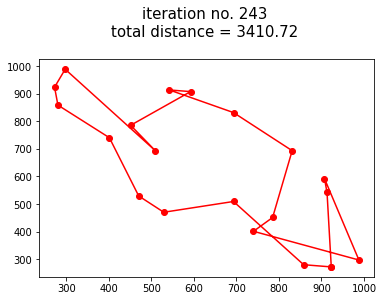

iteration =  243
total distance = 3410.72
popped


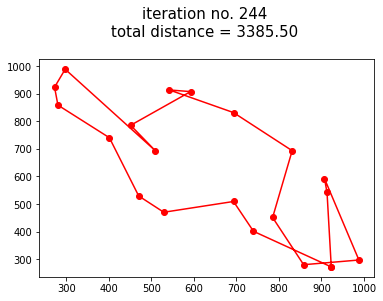

iteration =  244
total distance = 3385.50
popped


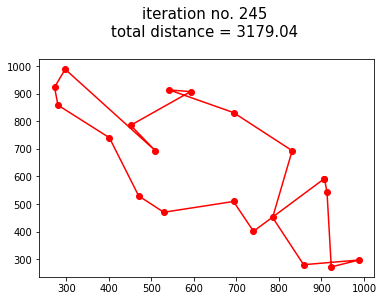

iteration =  245
total distance = 3179.04
popped


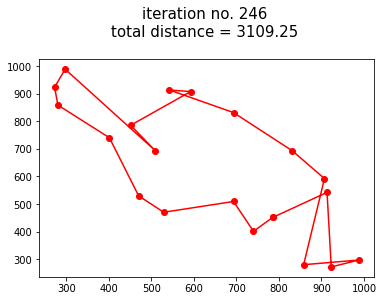

iteration =  246
total distance = 3109.25
popped


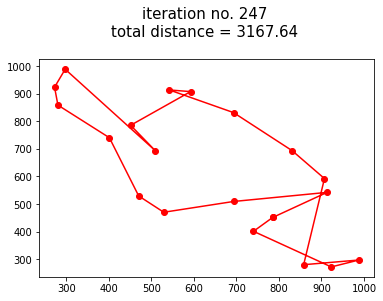

iteration =  247
total distance = 3167.64
popped


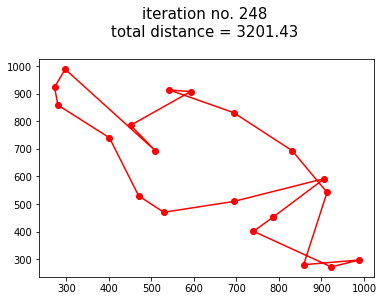

iteration =  248
total distance = 3201.43
popped


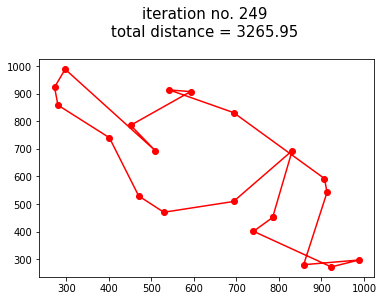

iteration =  249
total distance = 3265.95
popped


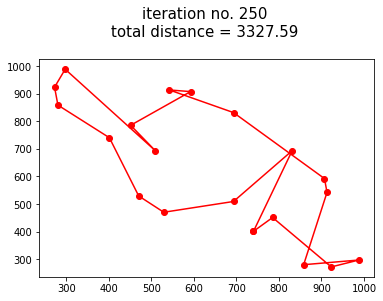

iteration =  250
total distance = 3327.59
popped


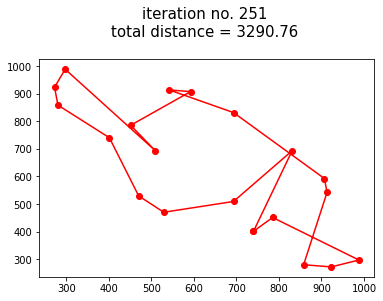

iteration =  251
total distance = 3290.76
popped


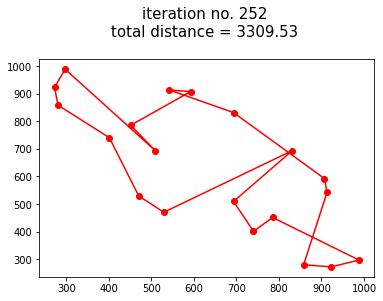

iteration =  252
total distance = 3309.53
popped


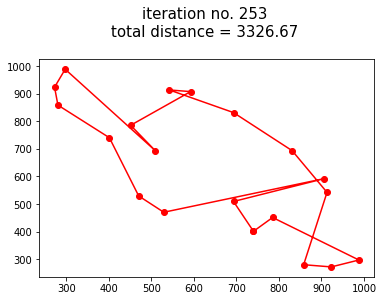

iteration =  253
total distance = 3326.67
popped


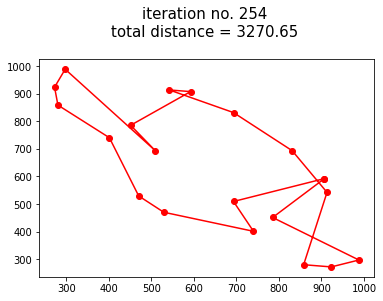

iteration =  254
total distance = 3270.65
popped


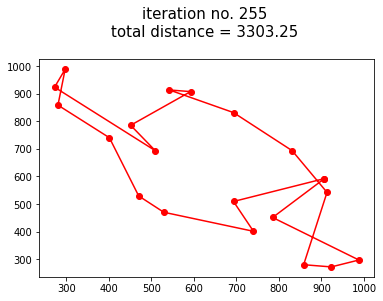

iteration =  255
total distance = 3303.25
popped


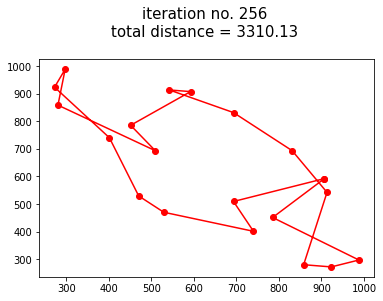

iteration =  256
total distance = 3310.13
popped


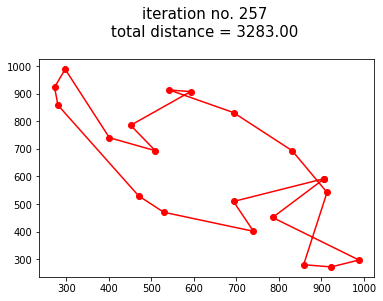

iteration =  257
total distance = 3283.00
popped


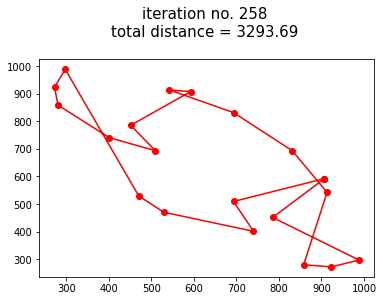

iteration =  258
total distance = 3293.69
popped


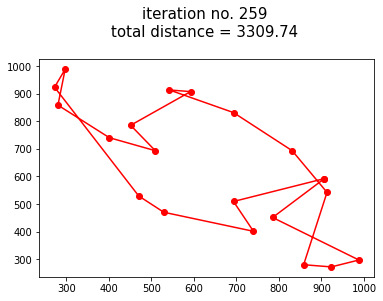

iteration =  259
total distance = 3309.74
popped


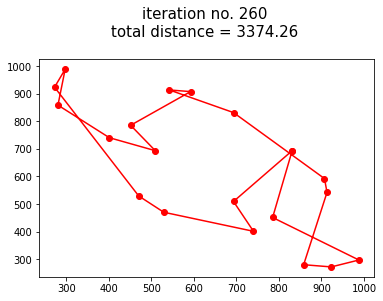

iteration =  260
total distance = 3374.26
popped


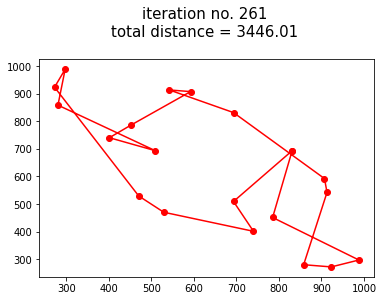

iteration =  261
total distance = 3446.01
popped


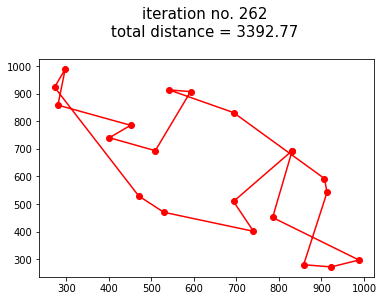

iteration =  262
total distance = 3392.77
popped


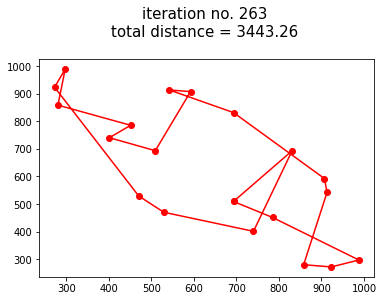

iteration =  263
total distance = 3443.26
popped


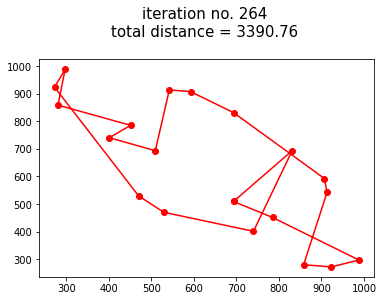

iteration =  264
total distance = 3390.76
popped


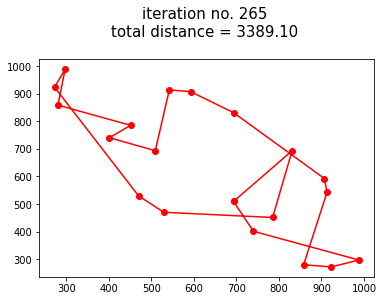

iteration =  265
total distance = 3389.10
popped


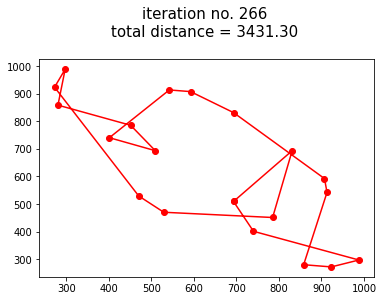

iteration =  266
total distance = 3431.30
popped


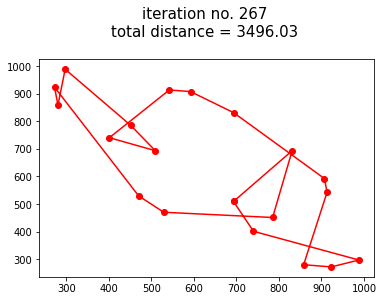

iteration =  267
total distance = 3496.03
popped


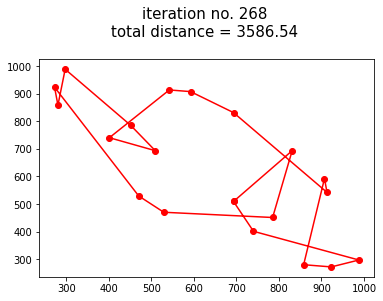

iteration =  268
total distance = 3586.54
popped


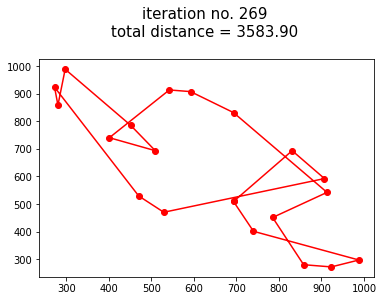

iteration =  269
total distance = 3583.90
popped


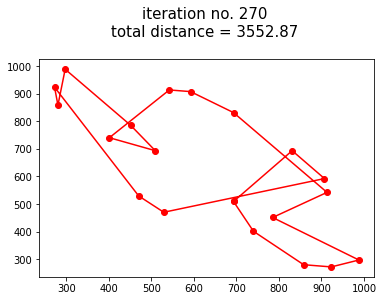

iteration =  270
total distance = 3552.87
popped


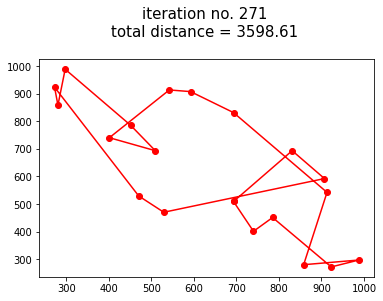

iteration =  271
total distance = 3598.61
popped


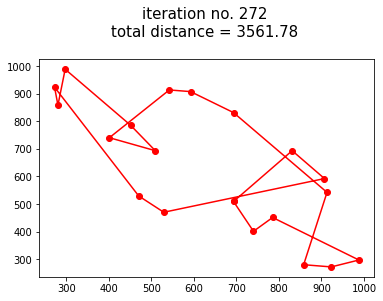

iteration =  272
total distance = 3561.78
popped


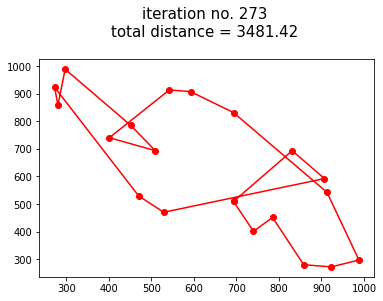

iteration =  273
total distance = 3481.42
popped


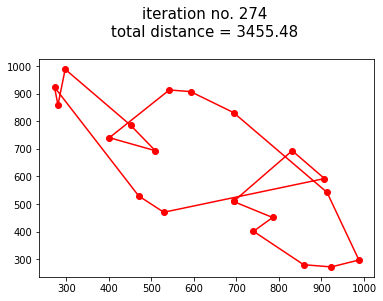

iteration =  274
total distance = 3455.48
popped


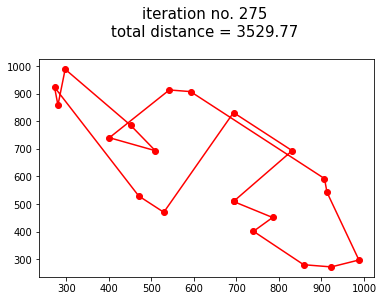

iteration =  275
total distance = 3529.77
popped


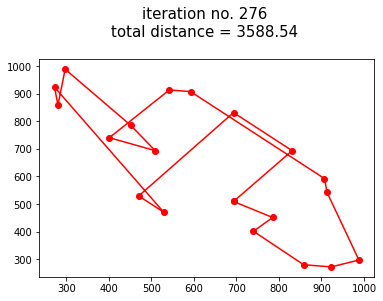

iteration =  276
total distance = 3588.54
popped


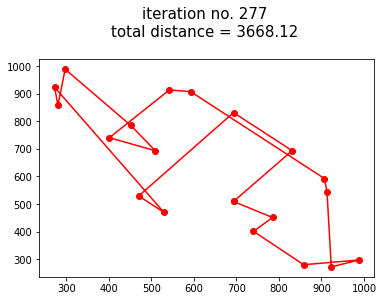

iteration =  277
total distance = 3668.12
popped


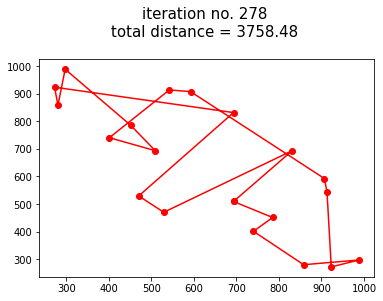

iteration =  278
total distance = 3758.48
popped


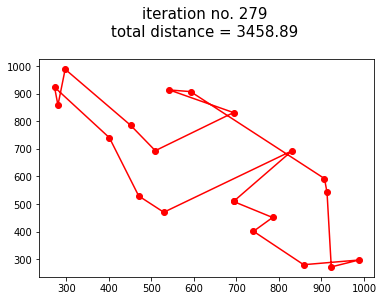

iteration =  279
total distance = 3458.89
popped


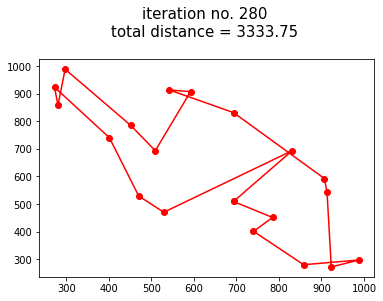

iteration =  280
total distance = 3333.75
popped


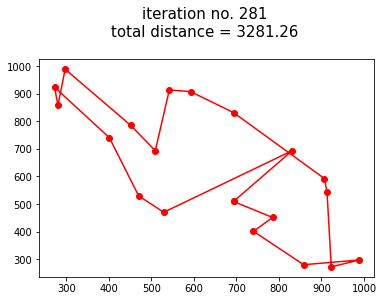

iteration =  281
total distance = 3281.26
popped


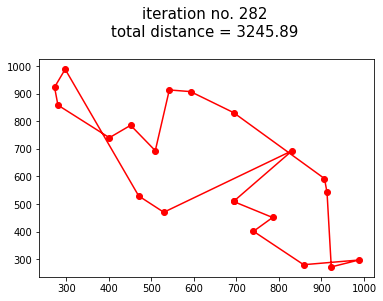

iteration =  282
total distance = 3245.89
popped


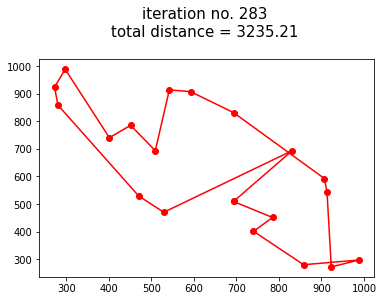

iteration =  283
total distance = 3235.21
popped


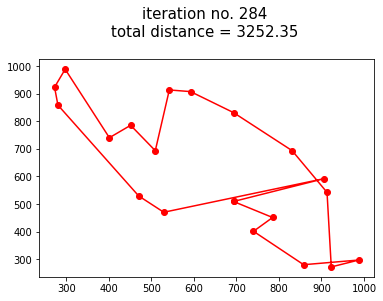

iteration =  284
total distance = 3252.35
popped


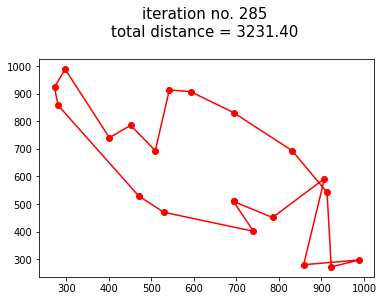

iteration =  285
total distance = 3231.40
popped


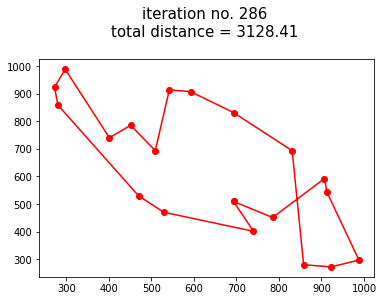

iteration =  286
total distance = 3128.41
popped


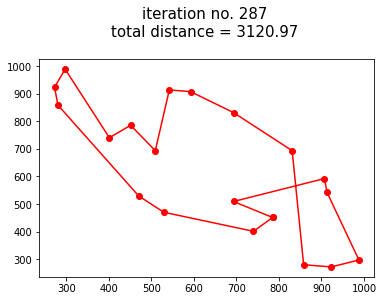

iteration =  287
total distance = 3120.97
popped


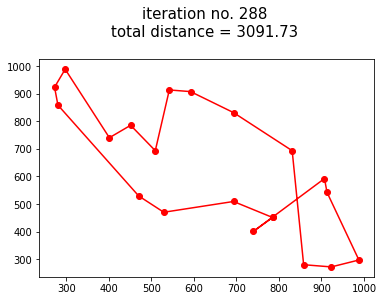

iteration =  288
total distance = 3091.73
popped


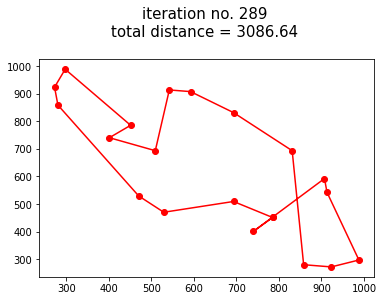

iteration =  289
total distance = 3086.64
popped


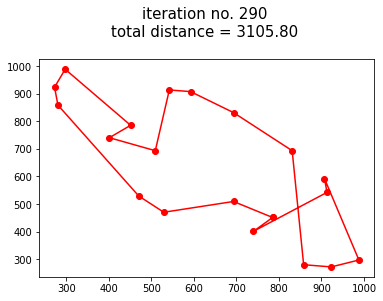

iteration =  290
total distance = 3105.80
popped


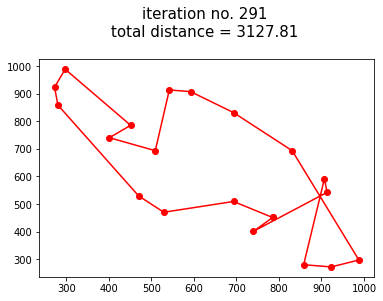

iteration =  291
total distance = 3127.81
popped


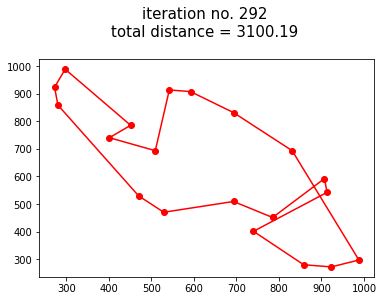

iteration =  292
total distance = 3100.19
popped


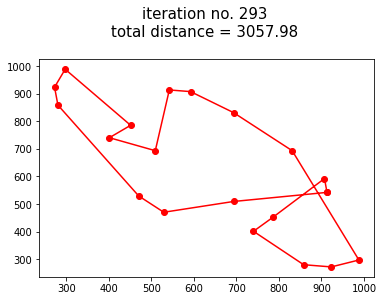

iteration =  293
total distance = 3057.98
popped


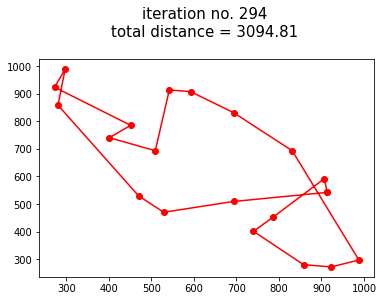

iteration =  294
total distance = 3094.81
popped


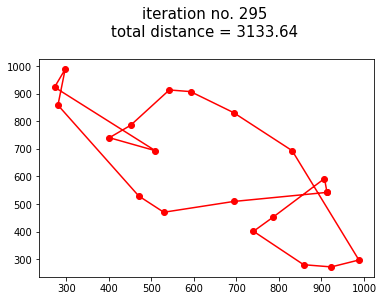

iteration =  295
total distance = 3133.64
popped


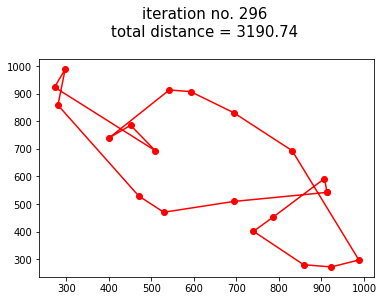

iteration =  296
total distance = 3190.74
popped


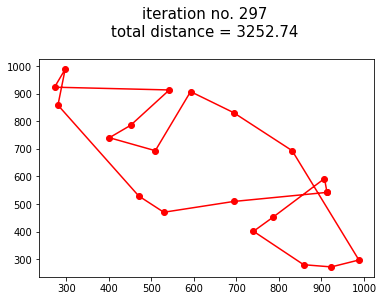

iteration =  297
total distance = 3252.74
popped


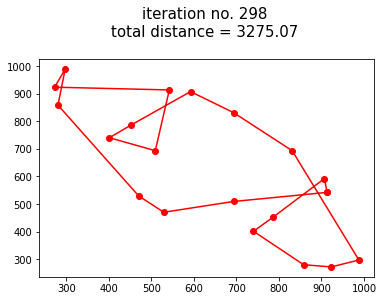

iteration =  298
total distance = 3275.07
popped


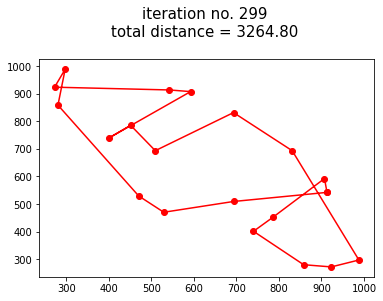

iteration =  299
total distance = 3264.80
popped


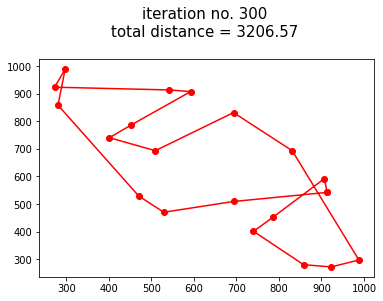

iteration =  300
total distance = 3206.57
popped


In [10]:
tabu_search(xcord,ycord,initial_cost,x)

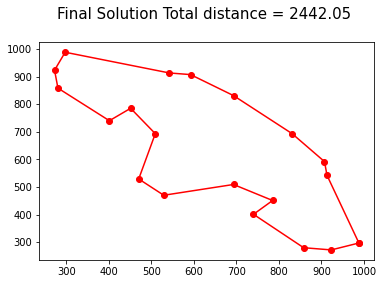

2442.047709710849


In [11]:
  newxcord = xcord_sol.copy() + [xcord_sol[0]]
  newycord = ycord_sol.copy() + [ycord_sol[0]]

  title = "Final Solution "
  title = title + ("Total distance = %.2f \n" % sbest)
  plt.title(title, fontsize = 15)

  axes = plt.gca()
  line, = axes.plot(newxcord, newycord, 'ro-')
  plt.savefig('sol')
  plt.show()

  distance=0
  for i in range(n):
    distance+=math.sqrt((newxcord[i]-newxcord[i+1])**2 + (newycord[i]-newycord[i+1])**2)
  
  print(f'{distance}')

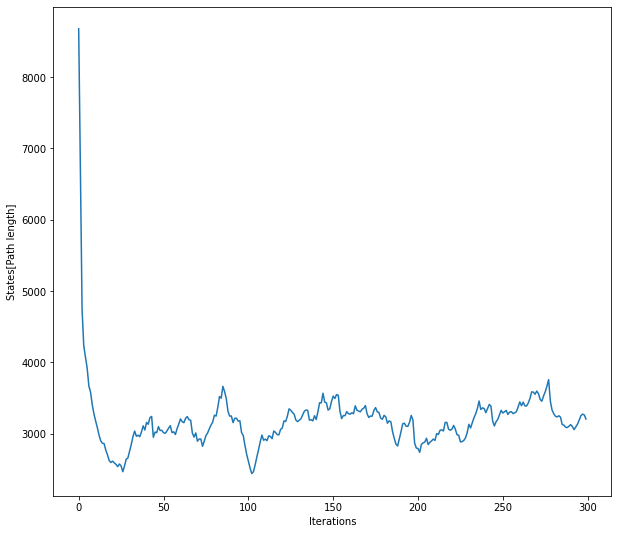

In [12]:
plt.figure(figsize=(10,9))
plt.plot(state_space)
plt.ylabel('States[Path length]')
plt.xlabel("Iterations")
plt.savefig("Taboo")
plt.show()
# plt.plot(best)